In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gudhi as gd
from gudhi.representations import PersistenceImage, BettiCurve, Entropy

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde

from pathlib import Path
from tqdm.notebook import tqdm

from itertools import product
from datetime import datetime

# load the methods from the src folder
from src.auxfunctions import get_all_classifications
from src.inputreader import read_persistence_files

In [15]:
data_input = Path('data_segmented')
input_airyscan = data_input / 'Airyscan'
input_sted = data_input / 'STED'

data_pers = Path('data_processed')
pers_sted = data_pers / 'persistence_sted'
pers_airyscan = data_pers / 'persistence_airyscan'
vectorization_sted = data_pers / 'vectorizations_sted'
vectorization_airyscan = data_pers / 'vectorizations_airyscan'

classification_path = data_pers / 'classification'
classification_path_thresholds = classification_path / 'thresholds'

figures_path = Path('figures_plots')

# Computations: Different thresholds on the persistence diagrams

This can take a long time, the `runs`, `runs_start` and the nameappend or used when doing different runs (on different machines) without the need of any parallizations inside of the program and saving auxiliary steps.

In [8]:
# Airyscan
preprocessing = 'clip_minmax_gaussian2c_minmax'
df_labels = pd.read_csv(data_pers / 'labels_persistence_airyscan.csv')
labels = df_labels['labels'].values

birth_thresholds = [0.0, -0.05, -0.1, -0.15, -0.2, -0.25, -0.3]
persistence_thresholds = [0.05, 0.0, 0.1, 0.15, 0.2]

print("TIME:", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
for pers_thresh, birth_thresh in tqdm(product(persistence_thresholds, birth_thresholds)):
    # if np.abs(birth_thresh) < pers_thresh:
    #     continue
    get_all_classifications(preprocessing,
        pers_airyscan, 
        classification_path_thresholds,
        labels,
        runs=10, 
        run_start=0,
        train_percent='70',
        random_state=42,
        persistence_threshold=pers_thresh,
        birth_threshold=birth_thresh,
        nameappend=f'thresh-birth-{int(np.abs(birth_thresh)*100):03d}'\
            f'-pers-{int(pers_thresh*100):03d}',
        saveasfile=True,  n_jobs=4)
    print("CURRENT TIME:", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))


TIME: 2025-05-29 08:21:11


0it [00:00, ?it/s]

Classification file: data_processed/classification/thresholds/thresh-birth-000-pers-005_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv ,
  reading: persistence_airyscan_clip_minmax_gaussian2c_minmax.npz


run 0 , vectorization: all, acc_bal: 0.9791666666666667


run 0 , vectorization: all, acc_bal: 0.875


run 0 , vectorization: all, acc_bal: 0.8049242424242424


run 0 , vectorization: all, acc_bal: 0.8428030303030303


run 0 , vectorization: all, acc_bal: 0.8465909090909092


run 0 , vectorization: all, acc_bal: 0.8465909090909092


run 0 , vectorization: all, acc_bal: 0.9128787878787878


run 0 , vectorization: all, acc_bal: 0.821969696969697


run 0 , vectorization: all, acc_bal: 0.8465909090909092


100%|██████████| 10/10 [06:28<00:00, 38.89s/it]

run 0 , vectorization: all, acc_bal: 0.8295454545454546
Finished for data_processed/persistence_airyscan/persistence_airyscan_clip_minmax_gaussian2c_minmax.npz
CURRENT TIME: 2025-05-29 08:27:41


Classification file: data_processed/classification/thresholds/thresh-birth-005-pers-005_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv ,
  reading: persistence_airyscan_clip_minmax_gaussian2c_minmax.npz


run 0 , vectorization: all, acc_bal: 0.9791666666666667


run 0 , vectorization: all, acc_bal: 0.875


run 0 , vectorization: all, acc_bal: 0.8049242424242424


run 0 , vectorization: all, acc_bal: 0.8428030303030303


run 0 , vectorization: all, acc_bal: 0.8465909090909092


run 0 , vectorization: all, acc_bal: 0.8465909090909092


run 0 , vectorization: all, acc_bal: 0.9128787878787878


run 0 , vectorization: all, acc_bal: 0.821969696969697


run 0 , vectorization: all, acc_bal: 0.8465909090909092


100%|██████████| 10/10 [06:29<00:00, 38.92s/it]

run 0 , vectorization: all, acc_bal: 0.8295454545454546
Finished for data_processed/persistence_airyscan/persistence_airyscan_clip_minmax_gaussian2c_minmax.npz
CURRENT TIME: 2025-05-29 08:34:11


Classification file: data_processed/classification/thresholds/thresh-birth-010-pers-005_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv ,
  reading: persistence_airyscan_clip_minmax_gaussian2c_minmax.npz


run 0 , vectorization: all, acc_bal: 0.9545454545454546


run 0 , vectorization: all, acc_bal: 0.8465909090909092


run 0 , vectorization: all, acc_bal: 0.8712121212121212


run 0 , vectorization: all, acc_bal: 0.821969696969697


run 0 , vectorization: all, acc_bal: 0.8257575757575758


run 0 , vectorization: all, acc_bal: 0.8011363636363636


 60%|██████    | 6/10 [04:06<02:44, 41.04s/it]


KeyboardInterrupt: 

In [3]:
# STED
preprocessing = 'clip_minmax_gaussian2c_minmax'
df_labels = pd.read_csv(data_pers / 'labels_persistence_airyscan.csv')
labels = df_labels['labels'].values

birth_thresholds = [0, -0.05, -0.1, -0.15, -0.2, -0.25, -0.3]
persistence_thresholds = [0, 0.05, 0.1, 0.15, 0.2]

print("TIME:", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
for pers_thresh, birth_thresh in tqdm(product(persistence_thresholds, birth_thresholds),
        total=len(persistence_thresholds) * len(birth_thresholds)):
    # if np.abs(birth_thresh) < pers_thresh:
    #     continue
    get_all_classifications(preprocessing,
        pers_sted, 
        classification_path_thresholds,
        labels,
        runs=10, 
        run_start=0,
        train_percent='70',
        # random_state=10,
        persistence_threshold=pers_thresh,
        birth_threshold=birth_thresh,
        nameappend=f'thresh-birth-{int(np.abs(birth_thresh)*100):03d}'\
            f'-pers-{int(pers_thresh*100):03d}',
        saveasfile=True,  n_jobs=4)
    print("CURRENT TIME:", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

TIME: 2025-05-29 08:51:52


  0%|          | 0/35 [00:00<?, ?it/s]

Classification file: data_processed/classification/thresholds/thresh-birth-000-pers-000_classification_sted_traintest_runs-10_perc-70_sted_clip_minmax_gaussian2c_minmax.csv ,
  reading: persistence_sted_clip_minmax_gaussian2c_minmax.npz


run 0 , vectorization: all, acc_bal: 0.7916666666666667


run 0 , vectorization: all, acc_bal: 0.8049242424242424


run 0 , vectorization: all, acc_bal: 0.821969696969697


 30%|███       | 3/10 [11:30<26:51, 230.18s/it]


KeyboardInterrupt: 

In [16]:
files = Path(classification_path_thresholds / 'random_state-42').glob('*.csv')
files = sorted([f for f in files if 'sted' in f.name])

for file in files:
    df = pd.read_csv(file)
    df_result = df.drop(columns=['prefix', 'run', 'hash_train', 'hash_test', 'birth_threshold', 'persistence_threshold']).groupby(['dim', 'type']).median()
    print(df_result['accuracy_balanced'])

dim  type
2    all     0.806818
     bc      0.784091
     ecc     0.730114
     ent     0.750947
     pi      0.742424
     stat    0.759470
3    all     0.721591
     bc      0.730114
     ecc     0.698864
     ent     0.725379
     pi      0.690341
     stat    0.726326
Name: accuracy_balanced, dtype: float64
dim  type
2    all     0.804924
     bc      0.787879
     ecc     0.730114
     ent     0.763258
     pi      0.678030
     stat    0.757576
3    all     0.700758
     bc      0.761364
     ecc     0.698864
     ent     0.730114
     pi      0.707386
     stat    0.749053
Name: accuracy_balanced, dtype: float64
dim  type
2    all     0.808712
     bc      0.808712
     ecc     0.730114
     ent     0.773674
     pi      0.754735
     stat    0.794508
3    all     0.700758
     bc      0.758523
     ecc     0.698864
     ent     0.737689
     pi      0.667614
     stat    0.792614
Name: accuracy_balanced, dtype: float64
dim  type
2    all     0.804924
     bc      0.763258
    

## plots for different thresholds (reading)

In [10]:
from src.auxfunctions import sanitize_persistence

persfolder = pers_sted
if Path(persfolder).is_dir():
    pers_all, pers_keys = read_persistence_files(persfolder,
        preprocessing=preprocessing,
        return_keys=True)
    filename = np.unique([f.name[f.name.index('persistence'):]
                            for f in pers_keys[:,0] if 'persistence' in f.name])

    if len(filename) > 1:
        print(filename)
        raise ValueError('More than one persistence file found')
    persfilename = Path(persfolder / filename[0])
else:
    raise ValueError('No persistence file found')

    if microscope is None:
        if 'sted' in persfilename.name.lower():
            microscope = 'sted'
        elif 'airyscan' in persfilename.name.lower() or 'airy' in persfilename.name.lower():
            microscope = 'airyscan'
        else:
            raise ValueError('Microscope not specified and not found in filename')

In [ ]:
# from gudhi import bottleneck_distance

# bottlenecks = {}
# for minpers in [0.05, 0.1, 0.15, 0.2]:
#     max_births = np.linspace(0.0, minpers, 10, endpoint=False)
#     pers_base = sanitize_persistence(pers_all[2][0],
#         max_birth=minpers, min_pers=minpers)
#     for persdim in [2,3]:
#         for dim in tqdm([0,1,2]):
#             if persdim == 2 and dim == 2:
#                 continue
#             for maxbirth in max_births:
#                 pers_comp = sanitize_persistence(pers_all[2][0],
#                     max_birth=maxbirth, min_pers=minpers)

#                 dist = np.array([bottleneck_distance(pers_base[i], pers_comp[i])
#                     if np.all(pers_comp[i] != pers_base[i])
#                     else 0.0
#                     for i in range(len(pers_base))])
#                 if (persdim, dim, minpers) in bottlenecks:
#                     bottlenecks[(persdim, dim, minpers)].\
#                         append(dist)
#                 else:
#                     bottlenecks[(persdim, dim, minpers)] = [dist]    

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

### plots

In [11]:
df_airy = []
df_sted = []

preprocessing = 'clip_minmax_gaussian2c_minmax'

for file in Path(classification_path / 'thresholds').iterdir():
    if (not('sted' in file.name 
            or 'airyscan' in file.name)
        or preprocessing not in file.name):
        continue
    if (file.name.split('_')[0].split('-')[1] != 'birth'
         or file.name.split('_')[0].split('-')[3] != 'pers'):
        continue

    df_tmp = pd.read_csv(file)    
    df_tmp['max_birth'] = -np.float32(file.name.split('_')[0].split('-')[2])/100
    df_tmp['min_pers'] = np.float32(file.name.split('_')[0].split('-')[4])/100

    if 'airyscan' in file.name:
        df_tmp['microscope'] = 'airyscan'
        df_airy.append(df_tmp.copy())
    elif 'sted' in file.name:
        df_tmp['microscope'] = 'sted'
        df_sted.append(df_tmp.copy())

# for the current run we have 35 different max birth and min persistence combinations, here we check if 
# we have the perfomance metrics for all of them and if they are on the same splits (by using the hashes)
assert np.all(pd.concat(df_airy).drop(columns='prefix').groupby(['hash_train', 'hash_test', 'dim', 'type']).count() == 35)
assert np.all(pd.concat(df_sted).drop(columns='prefix').groupby(['hash_train', 'hash_test', 'dim', 'type']).count() == 35)

df_class_airy = pd.concat(df_airy, ignore_index=True).sort_values(by=['min_pers', 'max_birth', 'dim', 'type', 'run'])
df_class_sted = pd.concat(df_sted, ignore_index=True).sort_values(by=['min_pers', 'max_birth', 'dim', 'type', 'run'])

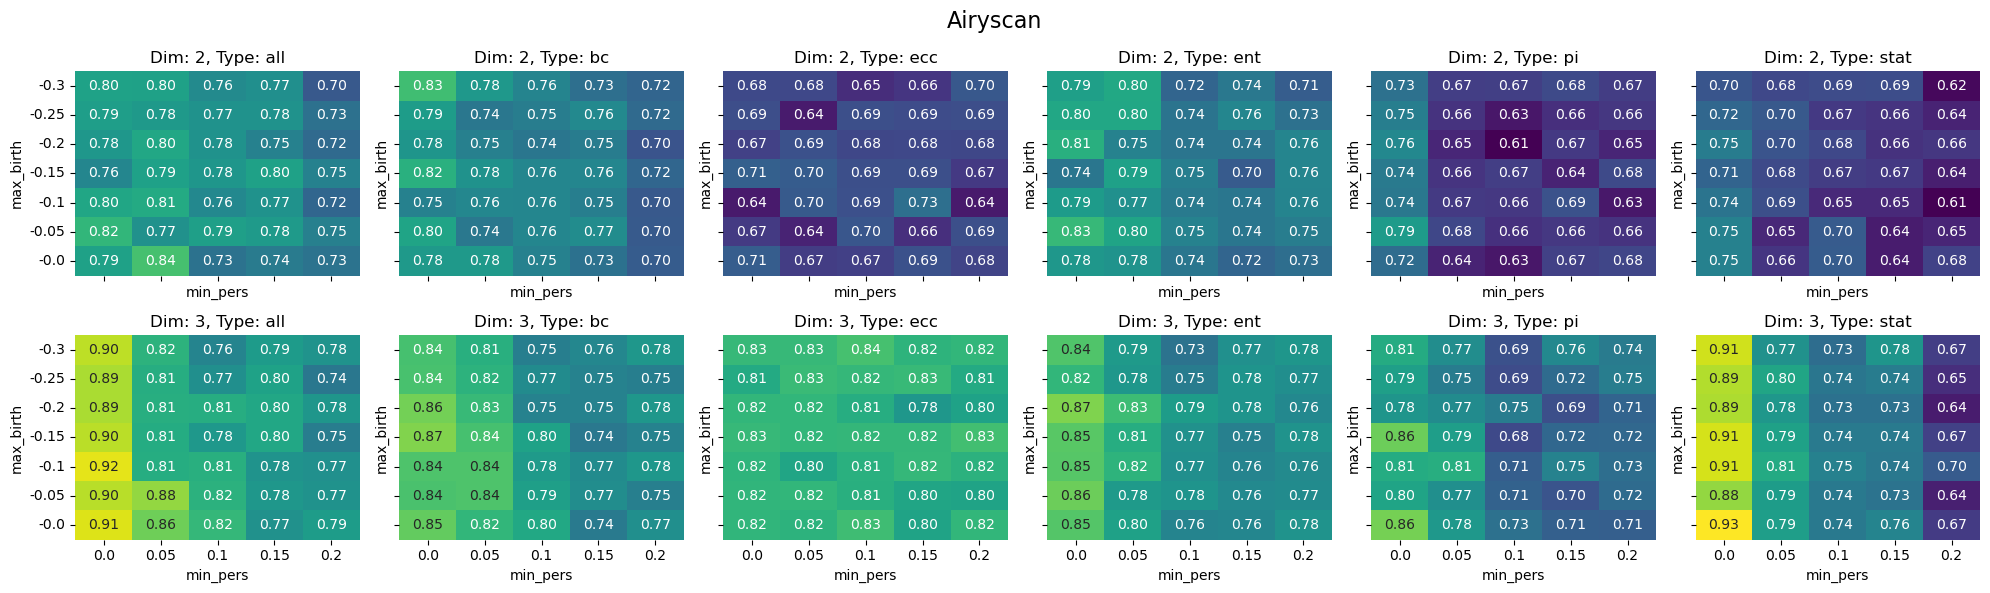

In [12]:
df_plot_grouped = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix', 'microscope']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()
types = df_plot_grouped['type'].unique()
vmin = df_plot_grouped['accuracy_balanced'].min()
vmax = df_plot_grouped['accuracy_balanced'].max()

# le_type = LabelEncoder()
# unq_vals = np.unique(np.stack([df_plot_grouped['dim'].values,
#     le_type.fit_transform(df_plot_grouped['type'].values)]).T,
#     axis=0)
# unq_vals = unq_vals.astype(str)
# unq_vals[:,1] = le_type.inverse_transform(unq_vals[:,1].astype(int))


# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(20, 6), sharex=True, sharey=True)

for dimi, dim in enumerate([2, 3]):
    for typei, ptype in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == ptype)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        sns.heatmap(df_plot, cmap='viridis',
                    annot=True, fmt='.2f',
                    vmin=vmin, vmax=vmax,
                    ax=ax[axi],
                    cbar=False)

        ax[axi].set_title(f'Dim: {dim}, Type: {ptype}')

fig.suptitle('Airyscan', fontsize=16)
fig.tight_layout()
# fig.savefig(Path('figures_plots', 'persistence_postprocess_airyscan_classification_full.pdf'), dpi=400)

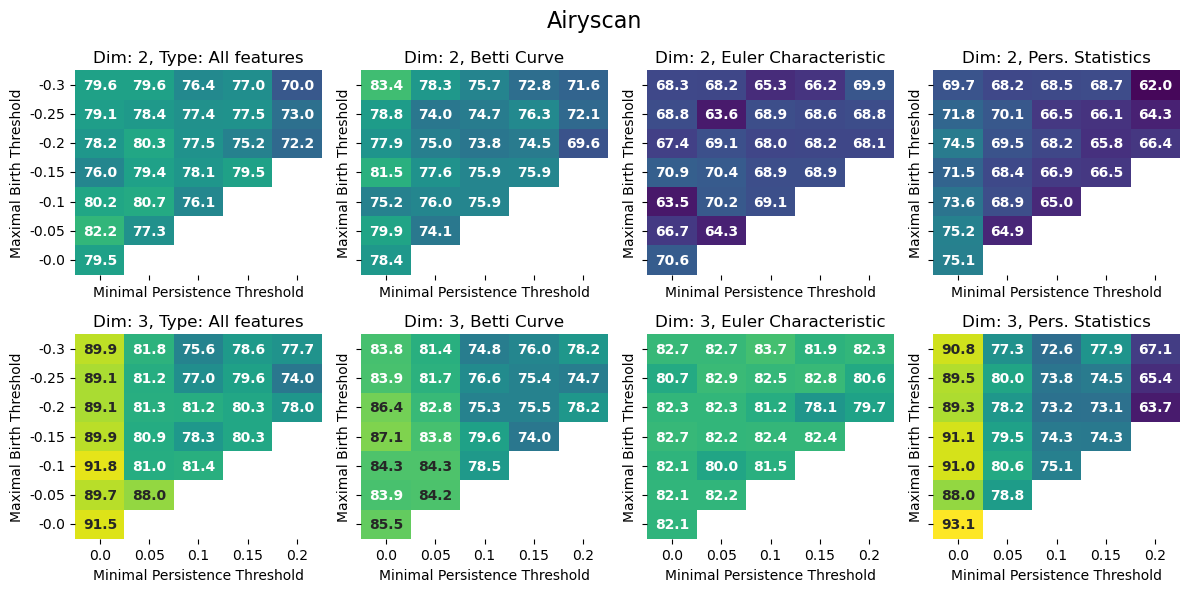

In [13]:
df_plot_grouped = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix', 'microscope']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()

df_plot_grouped = df_plot_grouped.loc[df_plot_grouped['type'].isin(['all', 'bc', 'ecc', 'stat']), :]
types = df_plot_grouped['type'].unique()
vmin = df_plot_grouped['accuracy_balanced'].min() * 100
vmax = df_plot_grouped['accuracy_balanced'].max() * 100

# le_type = LabelEncoder()
# unq_vals = np.unique(np.stack([df_plot_grouped['dim'].values,
#     le_type.fit_transform(df_plot_grouped['type'].values)]).T,
#     axis=0)
# unq_vals = unq_vals.astype(str)
# unq_vals[:,1] = le_type.inverse_transform(unq_vals[:,1].astype(int))


# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(12, 6), sharex=True, sharey=True)

for dimi, dim in enumerate([2, 3]):
    for typei, ptype in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == ptype)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        mask = np.zeros([7, 5], dtype=bool)
        for maski, maskj in enumerate(range(5)):
            mask[7-maski:, maskj] = True
        sns.heatmap(df_plot[[0.0, 0.05, 0.1, 0.15, 0.2]].map(lambda x: 100*x),
            cmap='viridis',
            mask=mask,
            annot=True, fmt='.1f',
            annot_kws={'weight': 'bold'},
            vmin=vmin, 
            vmax=vmax,
            ax=ax[axi],
            cbar=False)

        if ptype == 'all':
            ax[axi].set_title(f'Dim: {dim}, Type: All features')
        elif ptype == 'bc':
            ax[axi].set_title(f'Dim: {dim}, Betti Curve')
        elif ptype == 'ecc':
            ax[axi].set_title(f'Dim: {dim}, Euler Characteristic')
        elif ptype == 'ent':
            ax[axi].set_title(f'Dim: {dim}, Entropy')
        elif ptype == 'stat':
            ax[axi].set_title(f'Dim: {dim}, Pers. Statistics')
        ax[axi].set_ylabel('Maximal Birth Threshold')
        ax[axi].set_xlabel('Minimal Persistence Threshold')
    
fig.suptitle('Airyscan', fontsize=16)
fig.tight_layout()
fig.savefig(Path('figures_plots', 'persistence_postprocess_airyscan_classification_pick.pdf'), dpi=400)

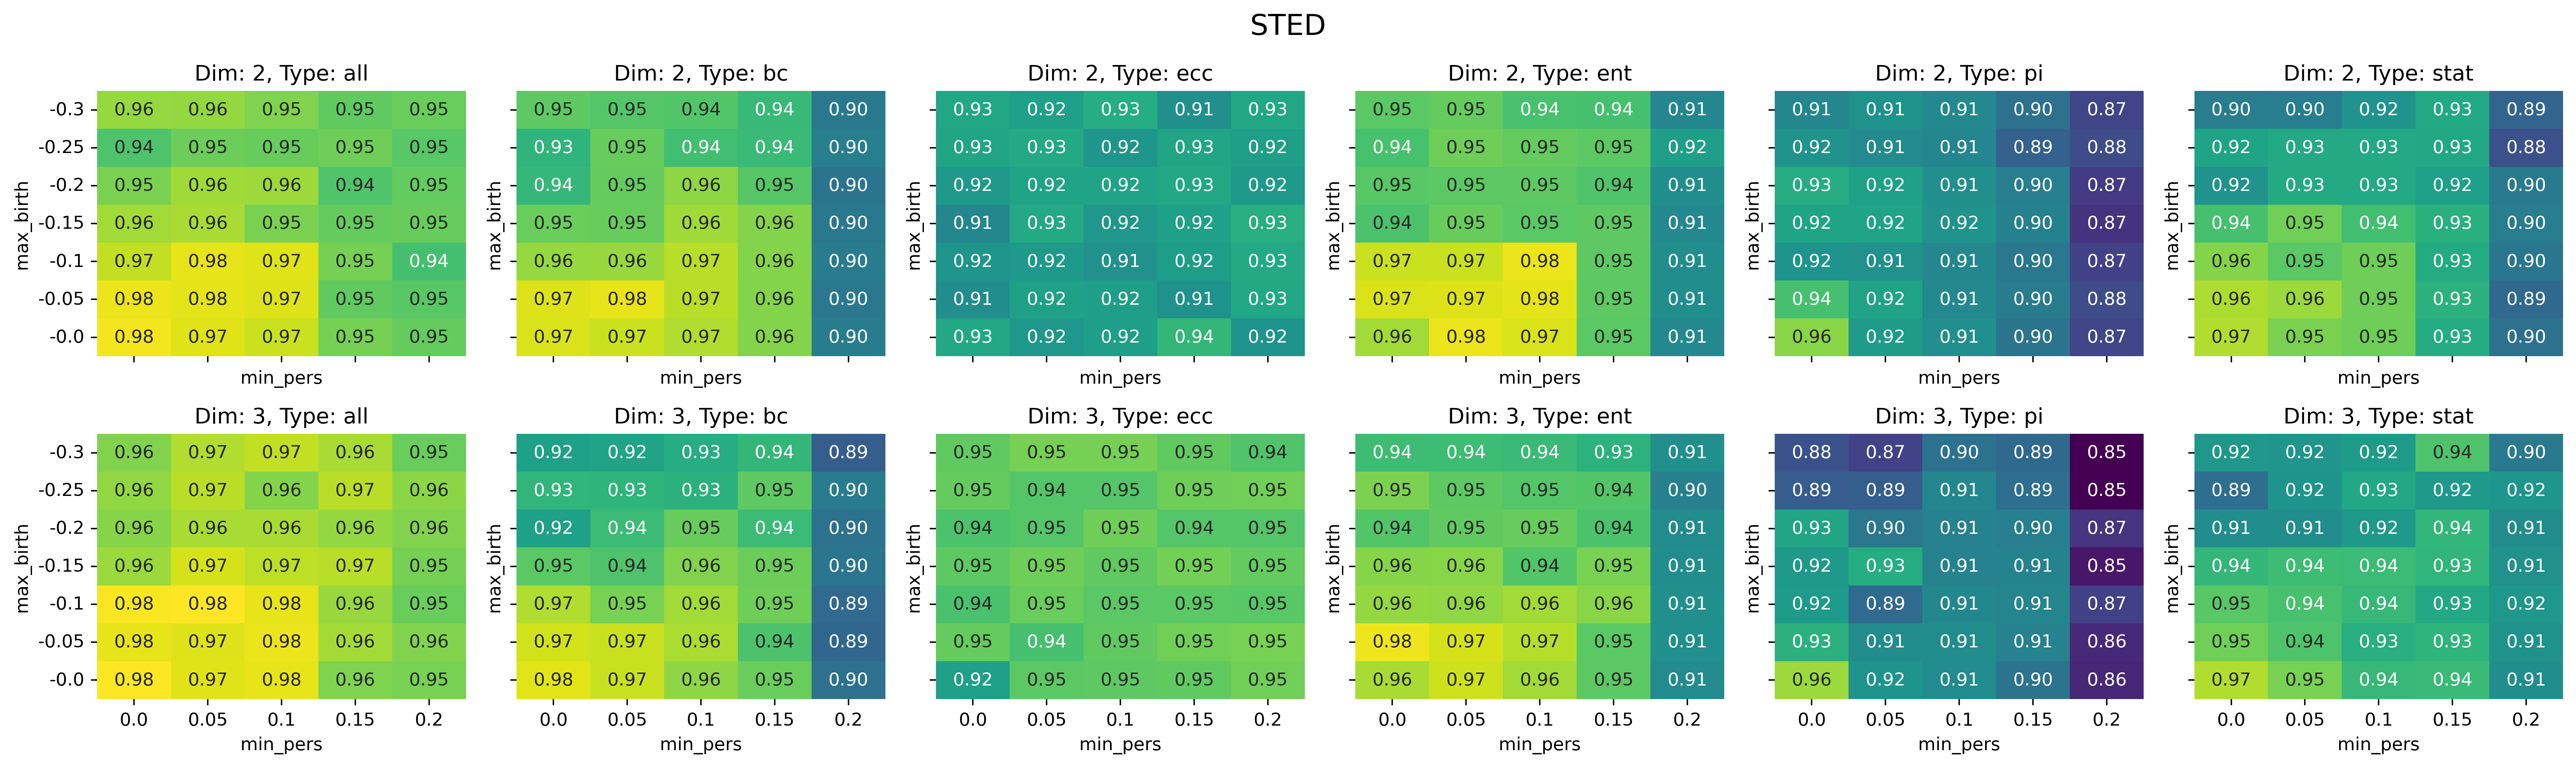

In [14]:
df_plot_grouped = df_class_sted.\
    drop(columns=['hash_train', 'hash_test', 'prefix', 'microscope']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()
types = df_plot_grouped['type'].unique()
vmin = df_plot_grouped['accuracy_balanced'].min()
vmax = df_plot_grouped['accuracy_balanced'].max()

# le_type = LabelEncoder()
# unq_vals = np.unique(np.stack([df_plot_grouped['dim'].values,
#     le_type.fit_transform(df_plot_grouped['type'].values)]).T,
#     axis=0)
# unq_vals = unq_vals.astype(str)
# unq_vals[:,1] = le_type.inverse_transform(unq_vals[:,1].astype(int))


# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(20, 6), sharex=True, sharey=True, dpi=400)

for dimi, dim in enumerate([2, 3]):
    for typei, ptype in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == ptype)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        sns.heatmap(df_plot, cmap='viridis',
                    annot=True, fmt='.2f',
                    vmin=vmin, vmax=vmax,
                    ax=ax[axi],
                    cbar=False)

        ax[axi].set_title(f'Dim: {dim}, Type: {ptype}')

fig.suptitle('STED', fontsize=16) 
fig.tight_layout()
# fig.savefig(Path('figures_plots', 'persistence_postprocess_sted_classification_full.pdf'), dpi=400)

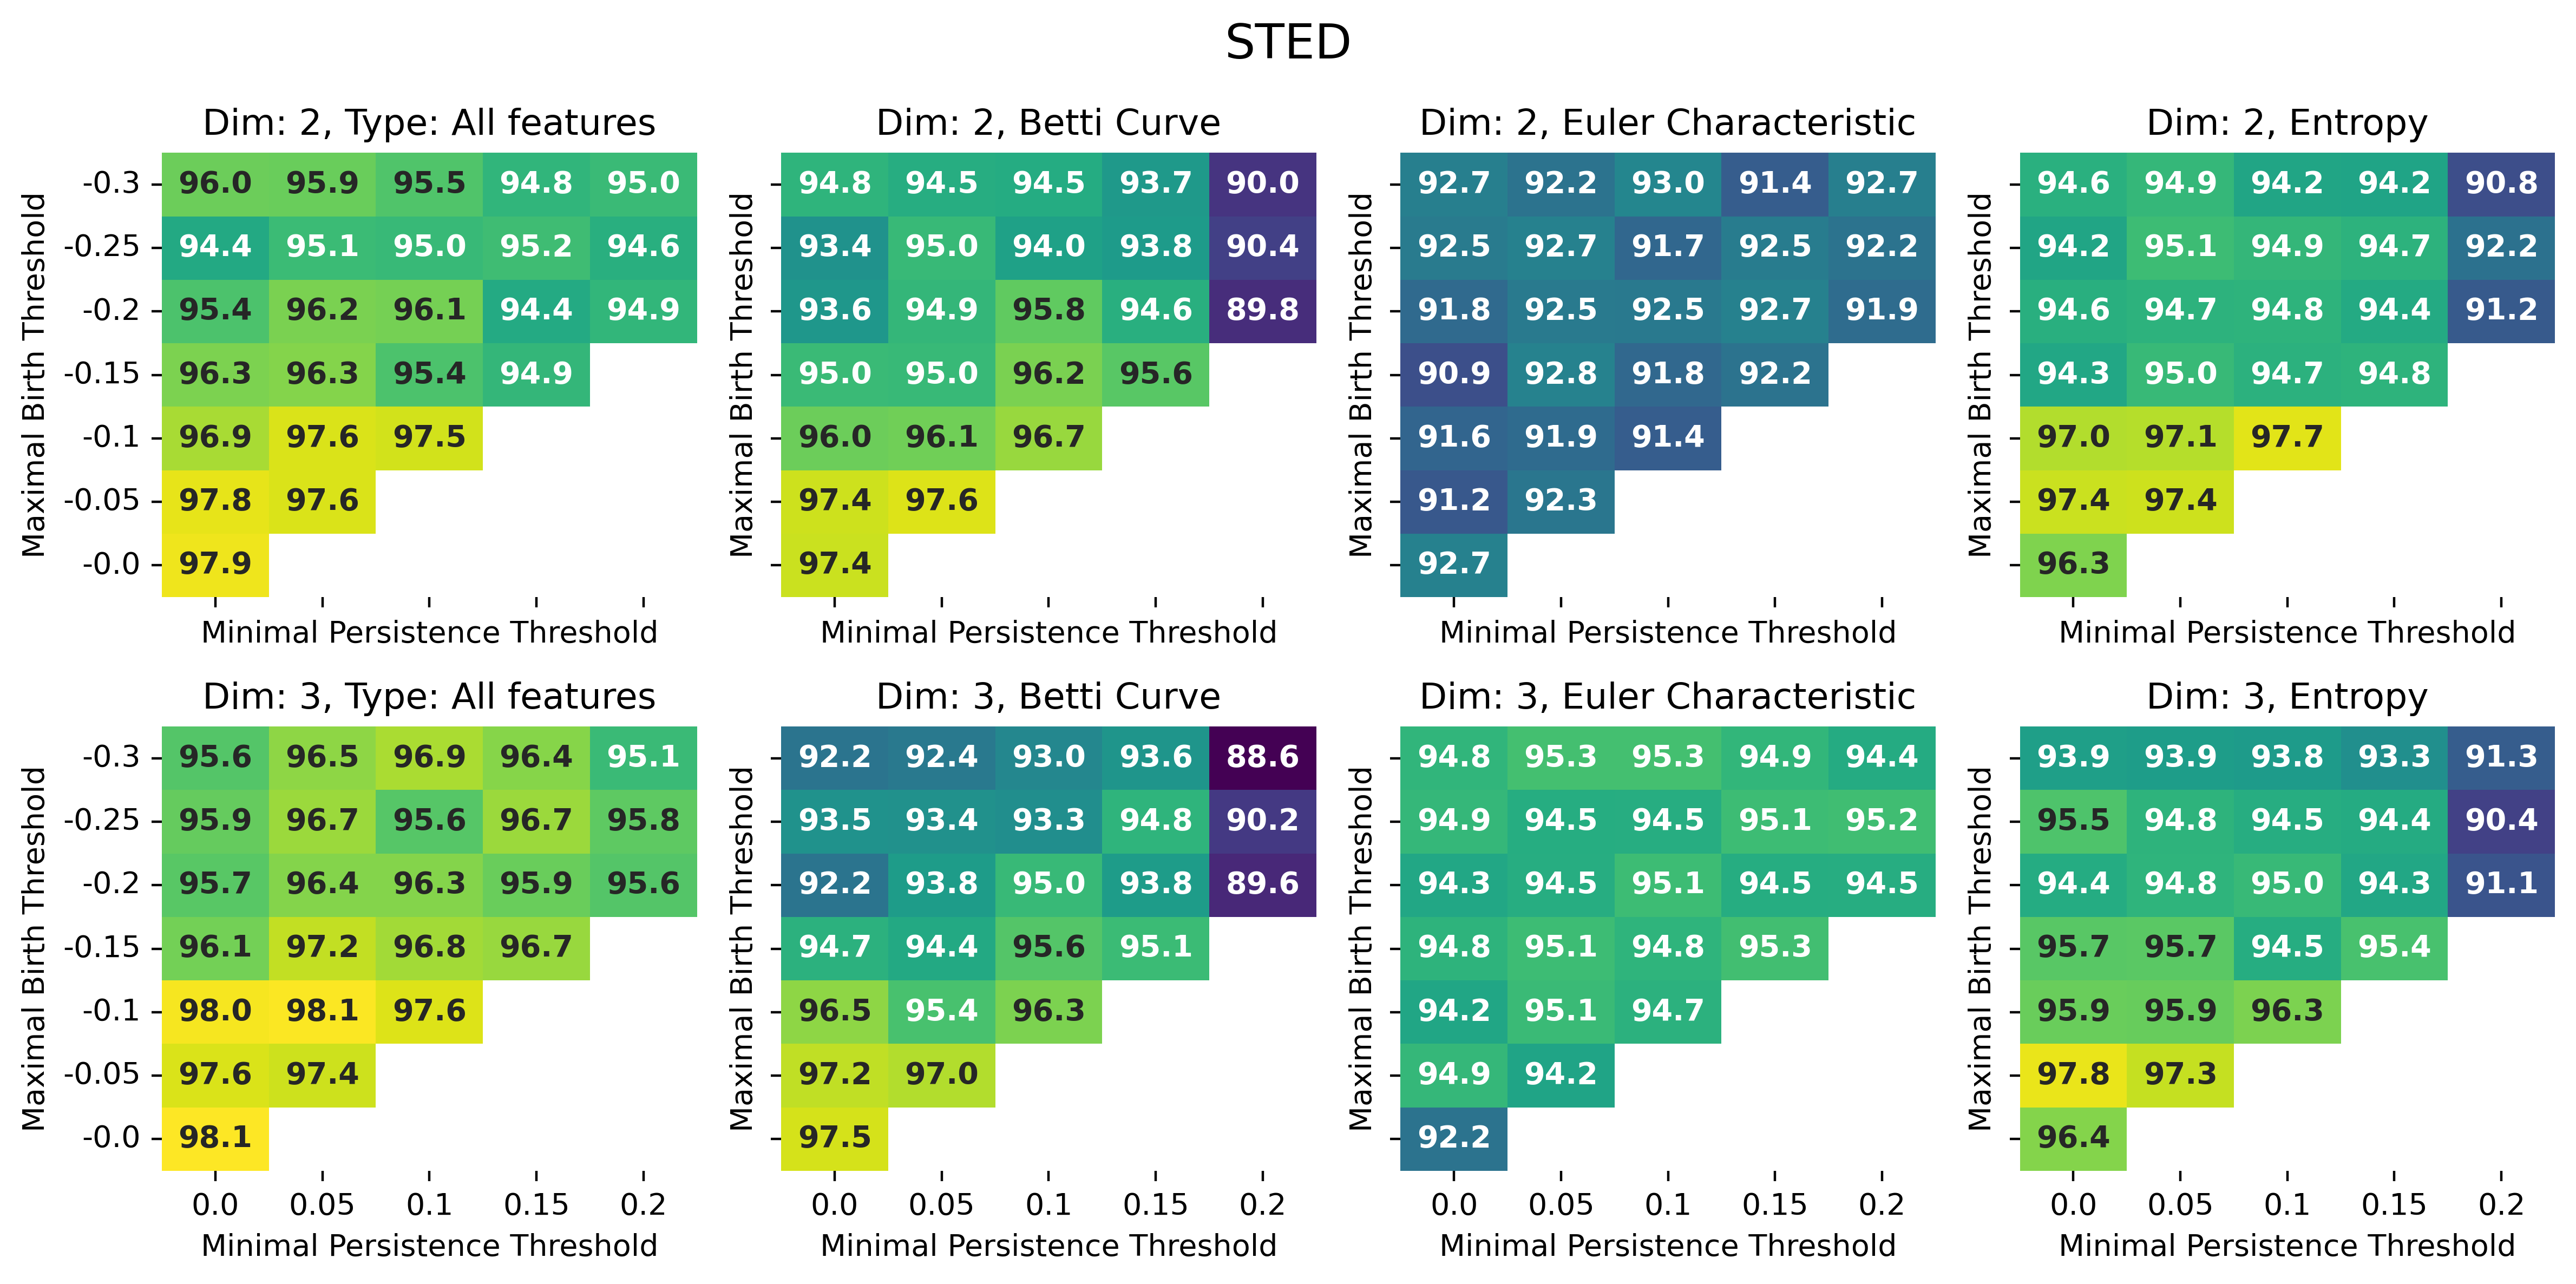

In [17]:
df_plot_grouped = df_class_sted.\
    drop(columns=['hash_train', 'hash_test', 'prefix', 'microscope']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()

# df_plot_grouped = df_plot_grouped.loc[df_plot_grouped['type'].isin(['all', 'bc', 'ecc', 'ent']), :]
df_plot_grouped = df_plot_grouped.loc[df_plot_grouped['type'].isin(['all', 'bc', 'ecc', 'ent']), :]
types = df_plot_grouped['type'].unique()
vmin = df_plot_grouped['accuracy_balanced'].min() * 100
vmax = df_plot_grouped['accuracy_balanced'].max() * 100

# df_plot_grouped['max_birth'] = [str(np.abs(x)) for x in df_plot_grouped['max_birth']]

# le_type = LabelEncoder()
# unq_vals = np.unique(np.stack([df_plot_grouped['dim'].values,
#     le_type.fit_transform(df_plot_grouped['type'].values)]).T,
#     axis=0)
# unq_vals = unq_vals.astype(str)
# unq_vals[:,1] = le_type.inverse_transform(unq_vals[:,1].astype(int))


# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(12, 6), sharex=True, sharey=True, dpi=400)

for dimi, dim in enumerate([2, 3]):
    for typei, ptype in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == ptype)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        mask = np.zeros([7, 5], dtype=bool)
        for maski, maskj in enumerate(range(5)):
            mask[7-maski:, maskj] = True
        sns.heatmap(df_plot[[0.0, 0.05, 0.1, 0.15, 0.2]].map(lambda x: 100*x),
            cmap='viridis',
            mask=mask,
            annot=True, fmt='.1f', 
            annot_kws={'weight': 'bold'},
            vmin=vmin, vmax=vmax,
            ax=ax[axi],
            cbar=False)

        if ptype == 'all':
            ax[axi].set_title(f'Dim: {dim}, Type: All features')
        elif ptype == 'bc':
            ax[axi].set_title(f'Dim: {dim}, Betti Curve')
        elif ptype == 'ecc':
            ax[axi].set_title(f'Dim: {dim}, Euler Characteristic')
        elif ptype == 'ent':
            ax[axi].set_title(f'Dim: {dim}, Entropy')
        elif ptype == 'stat':
            ax[axi].set_title(f'Dim: {dim}, Pers. Statistics')
        ax[axi].set_ylabel('Maximal Birth Threshold')
        ax[axi].set_xlabel('Minimal Persistence Threshold')
    
fig.suptitle('STED', fontsize=16)
fig.tight_layout()
fig.savefig(Path('figures_plots', 'persistence_postprocess_sted_classification_pick.pdf'), dpi=400)

Join both sted and airyscan for all features

In [78]:
df_plot_grouped = df_class_sted.\
    drop(columns=['hash_train', 'hash_test', 'prefix', 'microscope']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()

df_plot_grouped = df_plot_grouped.loc[df_plot_grouped['type'].isin(['all']), :]
df_plot_grouped.loc[:, 'microscope'] = 'sted'

df_plot_grouped2 = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix', 'microscope']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()

df_plot_grouped2 = df_plot_grouped2.loc[df_plot_grouped2['type'].isin(['all']), :]
df_plot_grouped2.loc[:, 'microscope'] = 'airyscan'

df_plot_grouped = pd.concat([df_plot_grouped, df_plot_grouped2], ignore_index=True).reset_index()

vmin = df_plot_grouped['accuracy_balanced'].min() * 100
vmax = df_plot_grouped['accuracy_balanced'].max() * 100

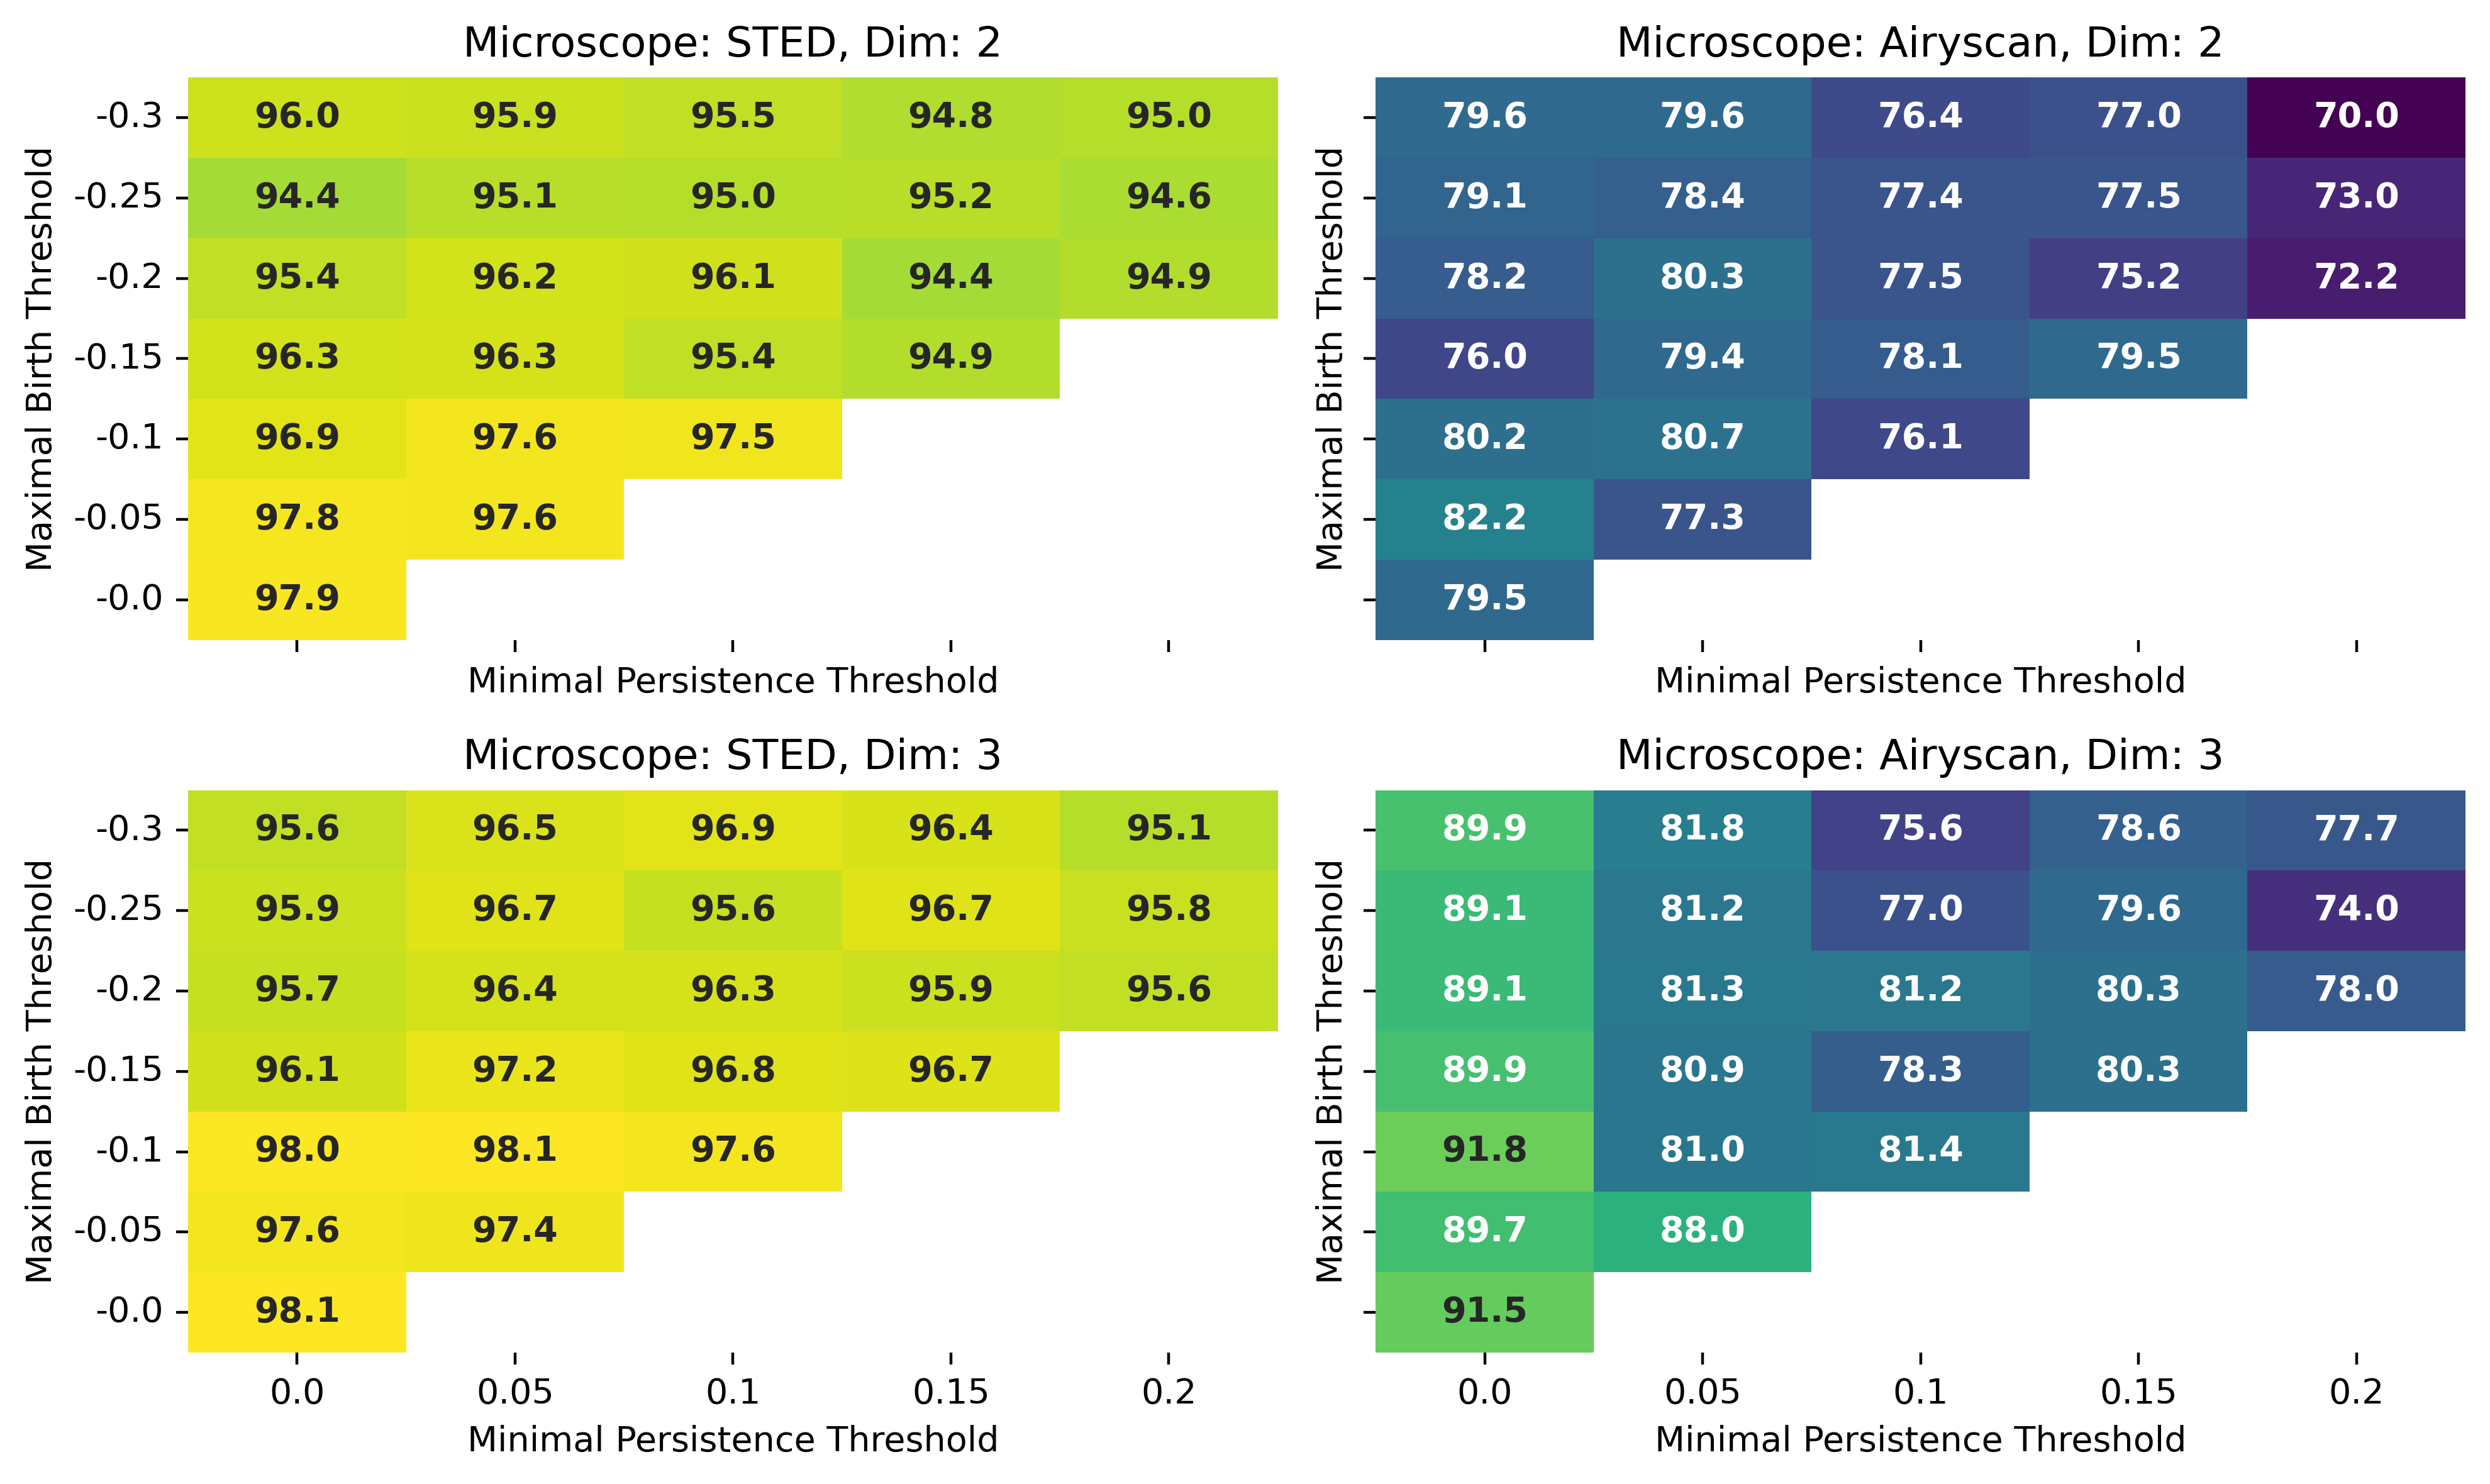

In [84]:
# Now plot the heatmaps
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True, dpi=400)

for dimi, dim in enumerate([2, 3]):
    for typei, ptype in enumerate(['sted', 'airyscan']):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['microscope'] == ptype)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        mask = np.zeros([7, 5], dtype=bool)
        for maski, maskj in enumerate(range(5)):
            mask[7-maski:, maskj] = True
        sns.heatmap(df_plot[[0.0, 0.05, 0.1, 0.15, 0.2]].map(lambda x: 100*x),
            cmap='viridis',
            mask=mask,
            annot=True, fmt='.1f', 
            annot_kws={'weight': 'bold'},
            vmin=vmin, vmax=vmax,
            ax=ax[axi],
            cbar=False)

        
        if ptype == 'airyscan':
            ax[axi].set_title(f'Microscope: Airyscan, Dim: {dim}')
        else:
            ax[axi].set_title(f'Microscope: STED, Dim: {dim}')
    
        ax[axi].set_ylabel('Maximal Birth Threshold')
        ax[axi].set_xlabel('Minimal Persistence Threshold')
fig.tight_layout()
fig.savefig(Path('figures_plots', 'persistence_postprocess_sted_airy_classification_allfeatures.pdf'), dpi=400)

In [ ]:



# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(12, 6), sharex=True, sharey=True, dpi=400)

for dimi, dim in enumerate([2, 3]):
    for typei, ptype in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == ptype)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        mask = np.zeros([7, 5], dtype=bool)
        for maski, maskj in enumerate(range(5)):
            mask[7-maski:, maskj] = True
        sns.heatmap(df_plot[[0.0, 0.05, 0.1, 0.15, 0.2]].map(lambda x: 100*x),
            cmap='viridis',
            mask=mask,
            annot=True, fmt='.1f', 
            annot_kws={'weight': 'bold'},
            vmin=vmin, vmax=vmax,
            ax=ax[axi],
            cbar=False)

        if ptype == 'all':
            ax[axi].set_title(f'Dim: {dim}, Type: All features')
        elif ptype == 'bc':
            ax[axi].set_title(f'Dim: {dim}, Betti Curve')
        elif ptype == 'ecc':
            ax[axi].set_title(f'Dim: {dim}, Euler Characteristic')
        elif ptype == 'ent':
            ax[axi].set_title(f'Dim: {dim}, Entropy')
        elif ptype == 'stat':
            ax[axi].set_title(f'Dim: {dim}, Pers. Statistics')
        ax[axi].set_ylabel('Maximal Birth Threshold')
        ax[axi].set_xlabel('Minimal Persistence Threshold')
    
fig.suptitle('STED', fontsize=16)
fig.tight_layout()
fig.savefig(Path('figures_plots', 'persistence_postprocess_sted_classification_pick.pdf'), dpi=400)

In [ ]:
## NOW DO JOIN

[]

#### old

In [ ]:
name = 'thresh-birth-000-pers-000_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax'

idx = name.index('birth')

birth_value = name[name.index('birth') + len('birth-'):].split('-')[0]
print(birth_value)

In [ ]:
class_files = sorted([file for file in classification_path.rglob('*classification*traintest_runs*.csv')
                      if preproc_choice in file.name
                       and 'airyscan' in file.name.lower()
                       and 'thresh' in file.name.lower()])
df_class_airy = []
for cli, classfilename in enumerate(class_files):
    name = classfilename.name
    df_tmp = pd.read_csv(classfilename)
    df_tmp.loc[:, 'max_birth'] = -np.float32(name[name.index('birth') + len('birth-'):].split('-')[0])/100
    df_tmp.loc[:, 'min_pers'] = np.float32(name[name.index('pers') + len('pers-'):].split('_')[0])/100
    df_class_airy.append(df_tmp.copy())

df_class_airy = pd.concat(df_class_airy)
df_class_airy = df_class_airy.sort_values(by=['dim', 'type', 'run'])

In [ ]:
df_plot = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).\
    agg(['mean', 'std']).\
    reset_index()

In [ ]:
df_plot = df_class_airy.melt(id_vars=['dim', 'type', 'max_birth', 'min_pers'],
                   value_vars=['accuracy_balanced'])

In [ ]:


df_plot_grouped = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()
types = df_plot_grouped['type'].unique()
vmin = df_plot_grouped['accuracy_balanced'].min()
vmax = df_plot_grouped['accuracy_balanced'].max()

# le_type = LabelEncoder()
# unq_vals = np.unique(np.stack([df_plot_grouped['dim'].values,
#     le_type.fit_transform(df_plot_grouped['type'].values)]).T,
#     axis=0)
# unq_vals = unq_vals.astype(str)
# unq_vals[:,1] = le_type.inverse_transform(unq_vals[:,1].astype(int))


# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(20, 6), sharex=True, sharey=True)

for dimi, dim in enumerate([2, 3]):
    for typei, type in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == type)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        sns.heatmap(df_plot, cmap='viridis',
                    annot=True, fmt='.2f',
                    vmin=vmin, vmax=vmax,
                    ax=ax[axi],
                    cbar=False)

        ax[axi].set_title(f'Dim: {dim}, Type: {type}')
    
fig.tight_layout()

# Plots: Different thresholds on the persistence diagrams

### plot betti curves for showing the effect of thresholding

In [44]:
preprocessing = 'clip_minmax_gaussian2c_minmax'
df_labels = pd.read_csv(data_pers / 'labels_persistence_sted.csv')
labels = df_labels['labels'].values

if Path(persfolder).is_dir():
    pers_all, pers_keys = read_persistence_files(persfolder,
        preprocessing=preprocessing,
        return_keys=True)
    filename = np.unique([f.name[f.name.index('persistence'):]
                          for f in pers_keys[:,0] if 'persistence' in f.name])
    if len(filename) > 1:
        raise ValueError('More than one persistence file found')
    persfilename = Path(persfolder / filename[0])
else:
    raise ValueError('No persistence file found')

In [45]:
persistence_threshold = 0
birth_threshold = 0

plots = [[], []]
for i in range(len(pers_all[3])):
    bc = BettiCurve(resolution=250)
    
    data = sanitize_persistence(pers_all[3][i],
        min_pers=persistence_threshold,
        max_birth=birth_threshold)
    X = bc.fit_transform(data)
    plots[0].append(bc.grid_.copy())
    plots[1].append(X.copy())

persistence_threshold = 0.05
birth_threshold = 0.1

plots_thresh = [[], []]
for i in range(len(pers_all[3])):
    bc = BettiCurve(predefined_grid=plots[0][i])
    
    data = sanitize_persistence(pers_all[3][i],
        min_pers=persistence_threshold,
        max_birth=birth_threshold)
    X = bc.fit_transform(data)
    
    plots_thresh[0].append(bc.grid_.copy())
    plots_thresh[1].append(X.copy())

for i in range(len(plots[0])):
    print(np.all(plots_thresh[0][i] ==  plots[0][i]))

True
True
True


In [53]:
plots[0][0][2]

-0.9880478087649402

In [54]:
df_plots_bc = []
for i, labeli in enumerate(labels):
    for k in range(len(plots[0])):
        for j in range(len(plots[0][k])):
            df_plots_bc.append({
                'label': labeli,
                'grid': plots[0][k][j] + k + 1,
                'betti_curve': plots[1][k][i][j],
                'betti_curve_thresh': plots_thresh[1][k][i][j]
            }.copy())

df_plots_bc = pd.DataFrame(df_plots_bc)

In [58]:
df_melt

label      grid            variable  value
0           0  0.003984         betti_curve    803
1           0  0.007968         betti_curve    890
2           0  0.011952         betti_curve    982
3           0  0.015936         betti_curve   1031
4           0  0.019920         betti_curve   1173
...       ...       ...                 ...    ...
716995      1  2.980144  betti_curve_thresh    108
716996      1  2.984115  betti_curve_thresh     71
716997      1  2.988086  betti_curve_thresh     40
716998      1  2.992057  betti_curve_thresh     40
716999      1  2.996029  betti_curve_thresh     17

[717000 rows x 4 columns]

In [61]:
df_melt = df_plots_bc.melt(id_vars=['label', 'grid'], value_vars=['betti_curve', 'betti_curve_thresh'])

<Axes: xlabel='grid', ylabel='value'>

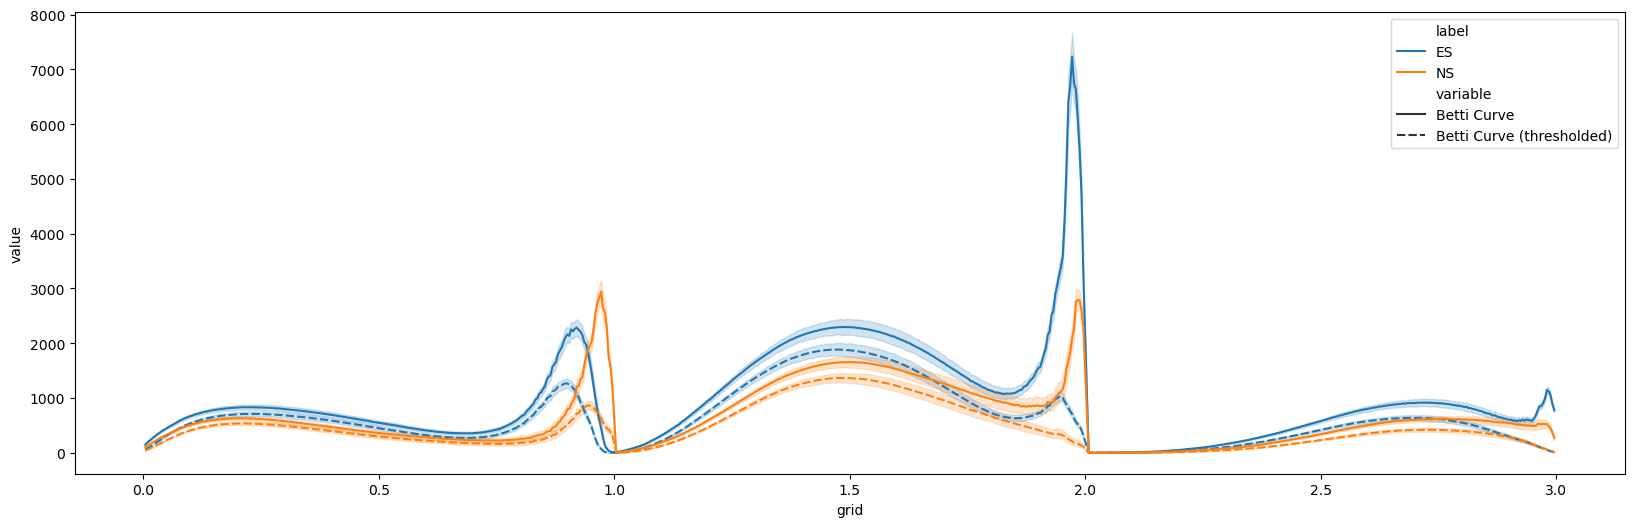

In [ ]:
df_melt = df_plots_bc.melt(id_vars=['label', 'grid'], value_vars=['betti_curve', 'betti_curve_thresh'])
df_melt['variable'] = df_melt['variable'].map({
    'betti_curve': 'Betti Curve',
    'betti_curve_thresh': 'Betti Curve (thresholded)'
})
df_melt['label'] = df_melt['label'].map({
    0: 'ES', 
    1: 'NS'
})

fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(data=df_melt, x='grid', y='value',
    hue='label', style='variable', ax=ax)
ax.vlines(0, 0, )

In [6]:
from src.auxfunctions import compute_hash, same_size_training, sanitize_persistence, drop_all_same, persistence_statistics

preprocessing = 'clip_minmax_gaussian2c_minmax'
df_labels = pd.read_csv(data_pers / 'labels_persistence_sted.csv')
labels = df_labels['labels'].values

invariant = 'bc'
cond = invariant

return_grid = True
grid = []

persfolder = pers_sted
savepath = classification_path
microscope=None
runs=10
train_percent='70'
run_start=0
persistence_threshold=None
birth_threshold=None
nameappend=''
saveasfile=False
n_jobs=6

if Path(persfolder).is_dir():
    pers_all, pers_keys = read_persistence_files(persfolder,
        preprocessing=preprocessing,
        return_keys=True)
    filename = np.unique([f.name[f.name.index('persistence'):]
                            for f in pers_keys[:,0] if 'persistence' in f.name])
    if len(filename) > 1:
        raise ValueError('More than one persistence file found')
    persfilename = Path(persfolder / filename[0])
else:
    raise ValueError('No persistence file found')

# get the splits
train_test_splits = same_size_training(labels, size=2*runs, train_size=int(train_percent)/100, seed=42)
hashes = np.array([[compute_hash(tt[0]), compute_hash(tt[1])] for tt in train_test_splits])

# now 
delete_idx = []
for i in range(len(hashes)):
    if hashes[i] in hashes[:i]:
        delete_idx.append(i)
train_test_splits = [train_test_splits[i] for i in range(len(train_test_splits)) if i not in delete_idx]
train_test_splits = train_test_splits[run_start:runs]
del hashes

assert len(train_test_splits) == runs - run_start

# now do the classification

results_tmp = []
for runk, train_test in tqdm(enumerate(train_test_splits),
                                total=len(train_test_splits),
                                smoothing=1):
    Xt_train = [[], []]
    Xt_test = [[], []]
    y_train = labels[train_test[0]]
    y_test = labels[train_test[1]]

    for prefix_dim in [2, 3]:
        train_idx = train_test[0]
        test_idx = train_test[1]
        resolution_pi=20
        bandwidth=4
        resolution_bc=250
        return_grid=True
        persistence_threshold = 0.05
        birth_threshold = -0.3
    
        assert 2 in pers_all.keys()
        assert 3 in pers_all.keys()
        assert invariant in ['stat', 'ent', 'bc', 'pi', 'ecc', 'all']
        assert prefix_dim in [2, 3]

        if return_grid:
            assert invariant in ['bc', 'ecc']

        X_train = []
        X_test = []
        y_train = labels[train_idx]
        y_test = labels[test_idx]

        if invariant != 'ecc':
            for dim in range(len(pers_all[prefix_dim])):
                data = pers_all[prefix_dim][dim]
                # data = [x[x[:, 1] != np.inf, :] for x in data]
                data = sanitize_persistence(data, min_pers=persistence_threshold,
                                            max_birth=birth_threshold)

                if invariant == 'stat': 
                    persstats, _ = persistence_statistics(data, return_names=True, lifespan=False)
                    
                    pers_st_train = persstats[train_idx, :]
                    if len(test_idx) > 0:
                        pers_st_test = persstats[test_idx, :]

                    idx_keep, pers_st_train = drop_all_same(pers_st_train)
                    if len(test_idx) > 0:
                        pers_st_test = pers_st_test[:, idx_keep]

                    X_train.append(pers_st_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_st_test)

                elif invariant == 'ent':
                    ent = Entropy(mode='vector', normalized=False)
                    pers_ent_train = ent.fit_transform([data[i] for i in train_idx])
                    if len(test_idx) > 0:
                        pers_ent_test = ent.transform([data[i] for i in test_idx])

                    ent = Entropy(mode='scalar', normalized=False)
                    pers_ent_train = np.hstack([ent.fit_transform([data[i] for i in train_idx]),
                                            pers_ent_train])
                    if len(test_idx) > 0:
                        pers_ent_test = np.hstack([ent.transform([data[i] for i in test_idx]),
                                                pers_ent_test])

                    idx_keep, pers_ent_train = drop_all_same(pers_ent_train)
                    if len(test_idx) > 0:
                        pers_ent_test = pers_ent_test[:, idx_keep]

                    X_train.append(pers_ent_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_ent_test)
                
                elif invariant == 'bc':
                    inv_bc = BettiCurve(resolution=resolution_bc)
                    pers_bc_train = inv_bc.fit_transform([data[i] for i in train_idx])
                    if len(test_idx) > 0:
                        pers_bc_test = inv_bc.transform([data[i] for i in test_idx])

                    idx_keep, pers_bc_train = drop_all_same(pers_bc_train)
                    if len(test_idx) > 0:
                        pers_bc_test = pers_bc_test[:, idx_keep]

                    X_train.append(pers_bc_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_bc_test)

                    if return_grid:
                        grid.append(inv_bc.grid_)
                
                elif invariant == 'pi':
                    inv_pi = PersistenceImage(bandwidth=bandwidth,
                            resolution=[resolution_pi, resolution_pi])
                    pers_pi_train = inv_pi.fit_transform([data[i] for i in train_idx])
                    if len(test_idx) > 0:
                        pers_pi_test = inv_pi.transform([data[i] for i in test_idx])

                    idx_keep, pers_pi_train = drop_all_same(pers_pi_train)
                    if len(test_idx) > 0:
                        pers_pi_test = pers_pi_test[:, idx_keep]

                    X_train.append(pers_pi_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_pi_test)
            X_train = np.hstack(X_train)
            if len(test_idx) > 0:
                X_test = np.hstack(X_test)
            else:
                X_test = np.array([])
        else:
            raise ValueError('Invalid invariant')

        # print('intermed', np.shape(X_train), np.shape(X_test), cond, prefix_dim)

    #     ss = StandardScaler()
    #     X_train = ss.fit_transform(X_train)
    #     X_test = ss.transform(X_test)

    #     # We can also use SimpleImputer etc
    #     # remove rows if they contain more than 20% of nan values

    #     # if np.any(np.isnan(X_train)) or np.any(np.isnan(X_test)):
    #     #     nanidx = np.all(np.isnan(X_train), axis=1)
    #     #     if np.any(nanidx):
    #     #         print('Dropping nan rows', np.sum(nanidx), cond)
    #     #         X_train = X_train[~nanidx, :]
    #     #         y_train = y_train[~nanidx]

    #     #     nanidx = np.all(np.isnan(X_test), axis=1)
    #     #     if np.any(nanidx):
    #     #         print('Dropping nan rows', np.sum(nanidx), cond)
    #     #         X_test = X_test[~nanidx, :]
    #     #         y_test = y_test[~nanidx]
        
    #     # if np.count_nonzero(np.sum(np.isnan(X_train), axis=1)) < 2:
    #     #     if np.sum(np.isnan(X_train), axis=1).max() > 10:
    #     #         # print('Dropping nan rows', np.sum(np.isnan(X_train), axis=1))
    #     #         idx_remain = ~np.any(np.isnan(X_train), axis=1)
    #     #         X_train = X_train[idx_remain, :]
    #     #         y_train = y_train[idx_remain]

        drop_col = np.unique(np.where(np.isnan(X_train))[1])
        if len(drop_col) > 0:
            print('Dropping nan columns', drop_col, cond)
            remaining_col = np.sum(np.isnan(X_train), axis=0) == 0
            X_train = X_train[:, remaining_col]
            X_test = X_test[:, remaining_col]

        idx_fill = np.where(np.abs(X_test) >= np.finfo(np.float32).max)
        X_test[idx_fill] = np.nanmean(X_train[:, np.unique(idx_fill[1])], axis=0)
        idx_fill = np.where(np.isnan(X_test))
        X_test[idx_fill] = np.nanmean(X_train[:, np.unique(idx_fill[1])], axis=0)

        if len(X_train.shape) == 0 or len(X_test.shape) == 0:
            print(np.shape(X_train), np.shape(X_test), cond)
            print(np.any(np.isnan(X_train)), np.any(np.isnan(X_test)))
            print('EMPTY training/test set', cond, persfilename.name)
            continue

        Xt_train[prefix_dim - 2].append(X_train.copy())
        Xt_test[prefix_dim - 2].append(X_test.copy())

    # # now do the Classification via GridSearch
    # if np.any(np.isnan(X_train)) or np.any(np.isnan(X_test)):
    #     print('NaN in training/test set', cond, persfilename.name)
    #     continue
    # print('run', run_start, ', vectorization:', cond, ', dim:', prefix_dim,
    #         ', shape:', np.shape(X_train), np.shape(X_test))
    break              

  0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
preprocessing = 'clip_minmax_gaussian2c_minmax'
df_labels = pd.read_csv(data_pers / 'labels_persistence_sted.csv')
labels = df_labels['labels'].values

invariant = 'bc'
cond = invariant

return_grid = True
grid = []

persfolder = pers_sted
savepath = classification_path
microscope=None
runs=10
train_percent='70'
run_start=0
persistence_threshold=None
birth_threshold=None
nameappend=''
saveasfile=False
n_jobs=6

if Path(persfolder).is_dir():
    pers_all, pers_keys = read_persistence_files(persfolder,
        preprocessing=preprocessing,
        return_keys=True)
    filename = np.unique([f.name[f.name.index('persistence'):]
                            for f in pers_keys[:,0] if 'persistence' in f.name])
    if len(filename) > 1:
        raise ValueError('More than one persistence file found')
    persfilename = Path(persfolder / filename[0])
else:
    raise ValueError('No persistence file found')

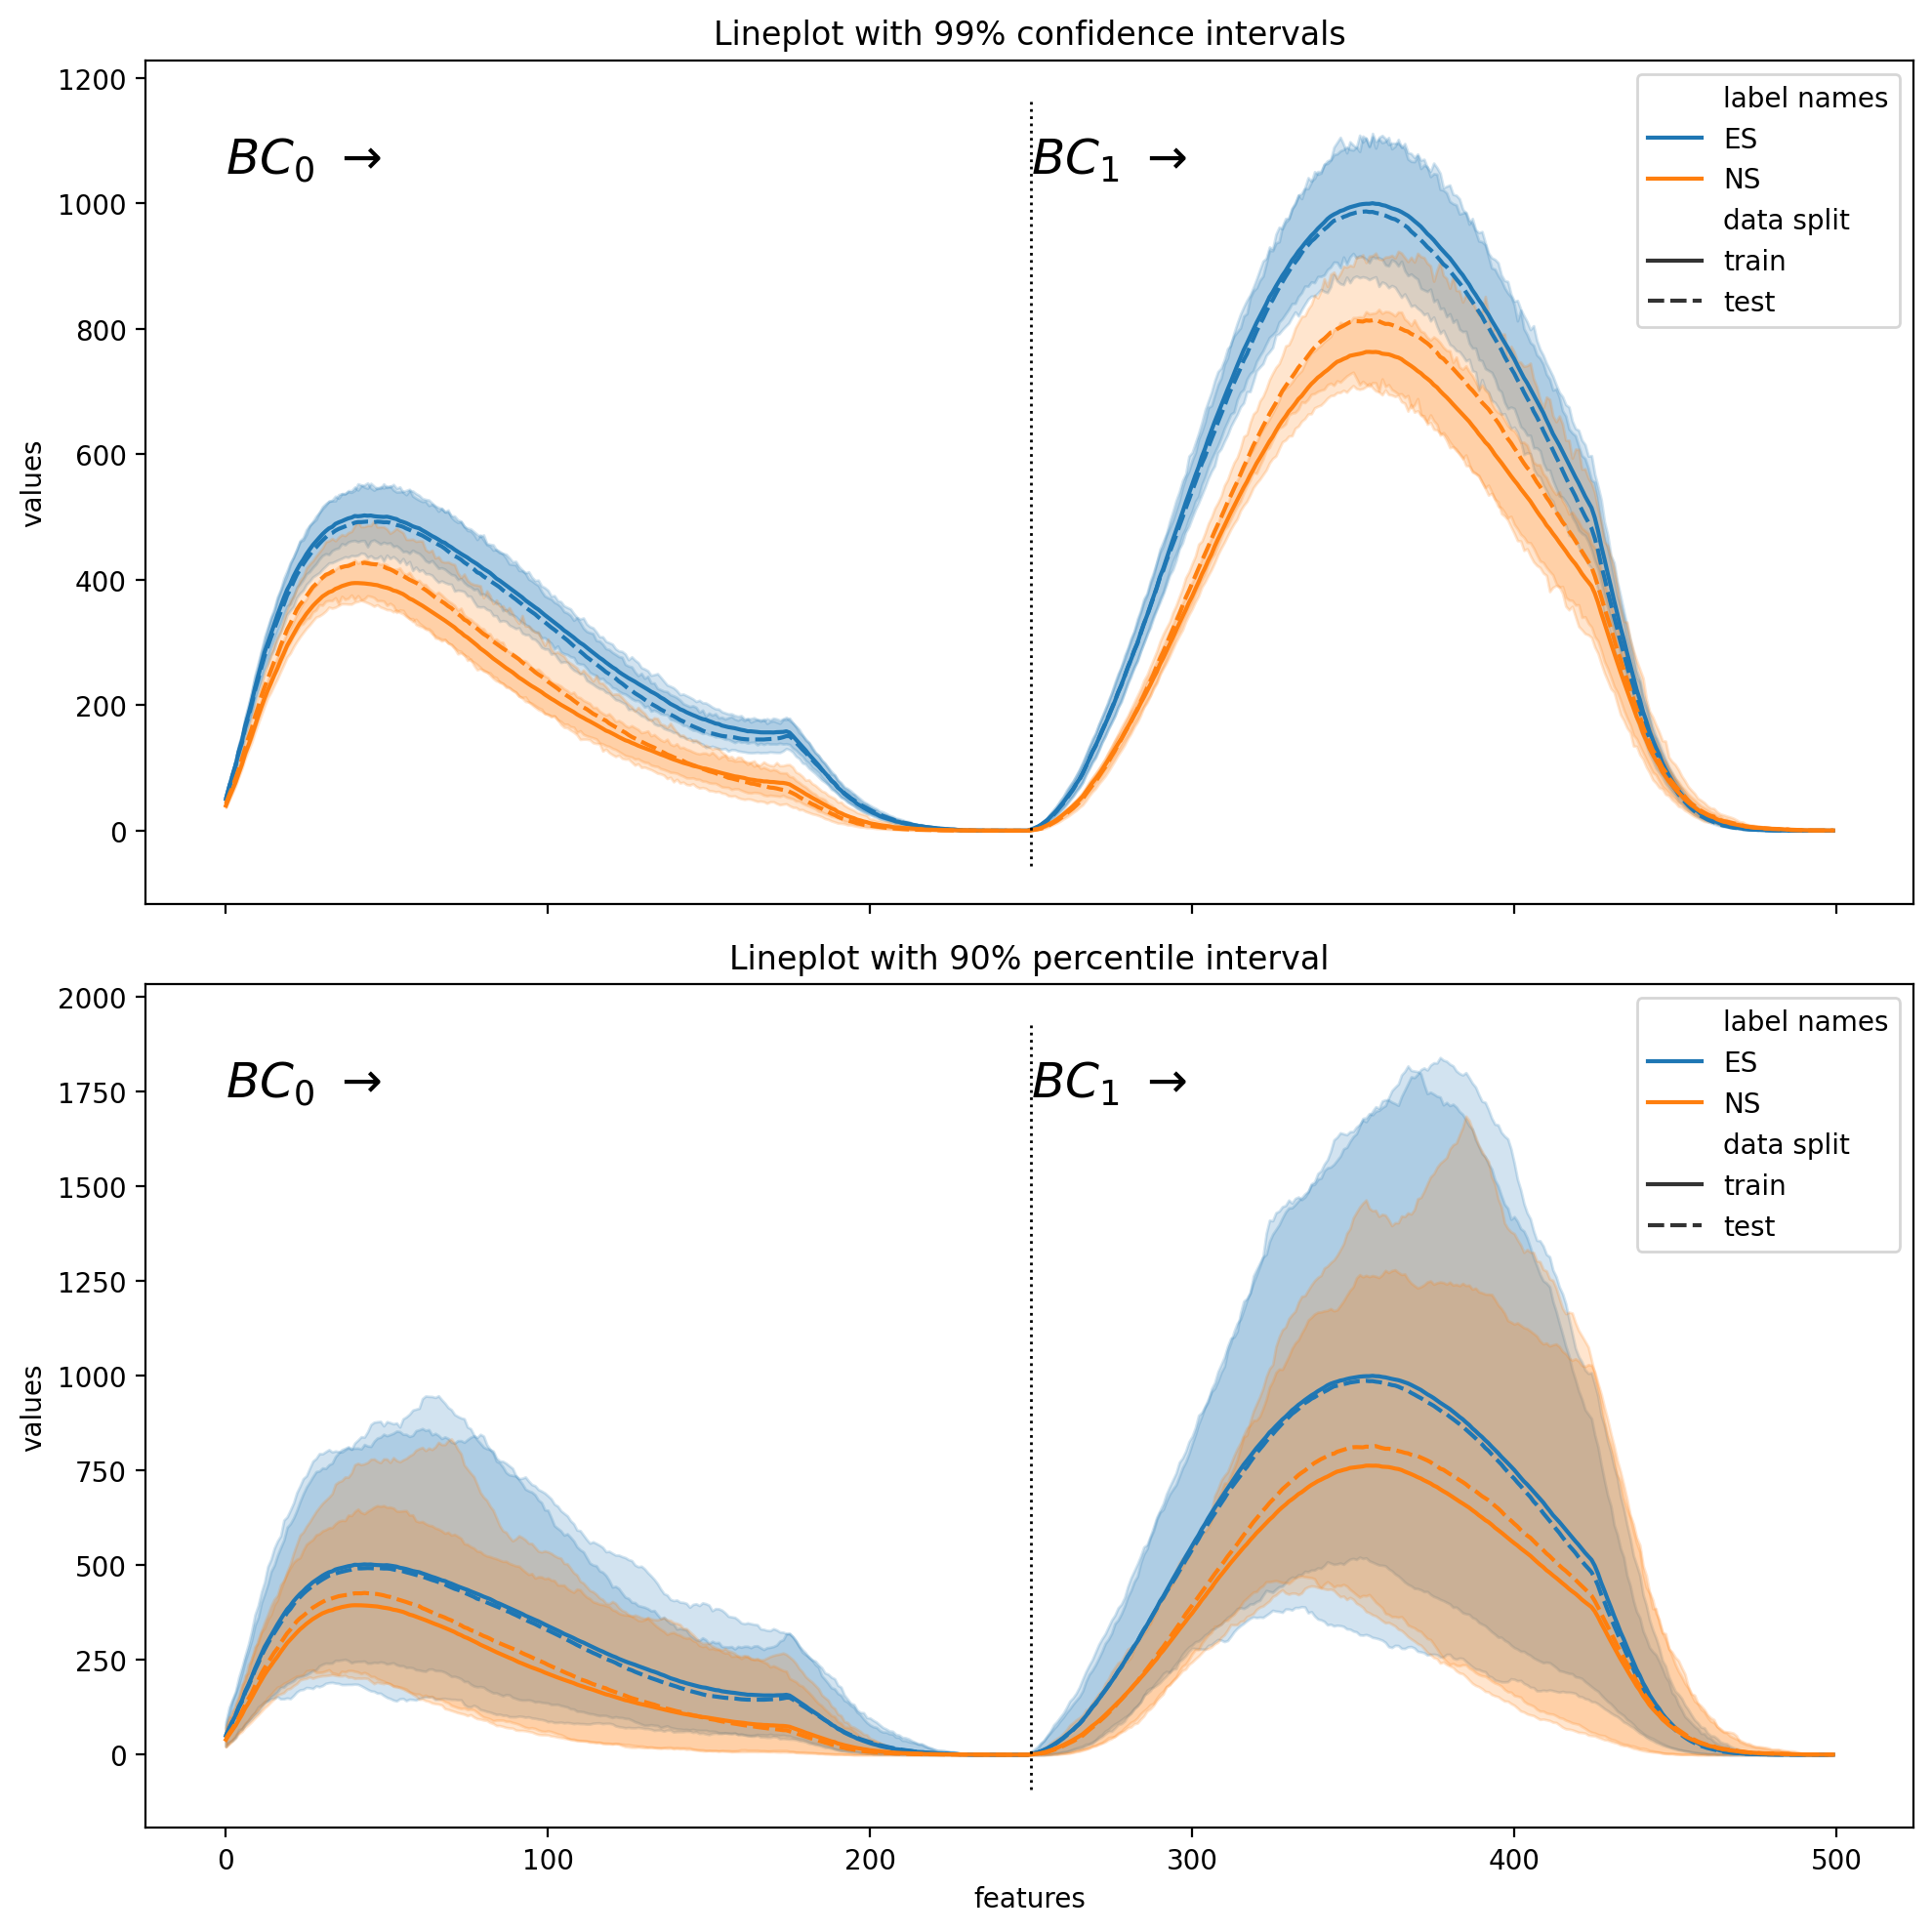

In [25]:
dim = 2
dim = dim -2

df_plot = pd.DataFrame(np.vstack([Xt_train[dim][0], Xt_test[dim][0]]),
                       columns=np.arange(Xt_train[dim][0].shape[1]))
# df_plot['labels'] = np.hstack([y_train, y_test]).astype(np.int32)
# df_plot['train'] = np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)

df_plot.loc[:, 'label names'] = ['ES' if x == 0 else 'NS'
    for x in np.hstack([y_train, y_test]).astype(np.int32)]
df_plot.loc[:, 'data split'] = ['test' if x == 0 else 'train'
    for x in np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)]

df_melt = df_plot.melt(id_vars=['label names', 'data split'],
                       var_name='features', value_name='values')

fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=200, sharex=True)
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('ci', 99), ax=ax[0])
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('pi', 90), ax=ax[1])

dim_borders = [np.shape(Xt_train[dim][0])[1]/(dim+2) * j 
               for j in range(dim+2 + 1)]
dim_textplacement = [0.1 * (dim_borders[i+1] - dim_borders[i+1]) + dim_borders[i]
                     for i in range(len(dim_borders)-1)]

for i in range(len(ax)):
    for j in range(dim + 2):
        ax[i].text(dim_textplacement[j], 0.95 * ax[i].get_ylim()[1],
                 fr'$BC_{j} ~\rightarrow$', fontsize=18,
                 ha='left', va='top', color='black')
        if j > 0:
            ax[i].vlines(np.shape(Xt_train[dim][0])[1]//(dim+2) * j,
                        ax[i].get_ylim()[0], ax[i].get_ylim()[1],
                        color='black', ls='dotted', lw=1)
        
ax[0].set_title('Lineplot with 99% confidence intervals')
ax[1].set_title('Lineplot with 90% percentile interval')
fig.tight_layout()

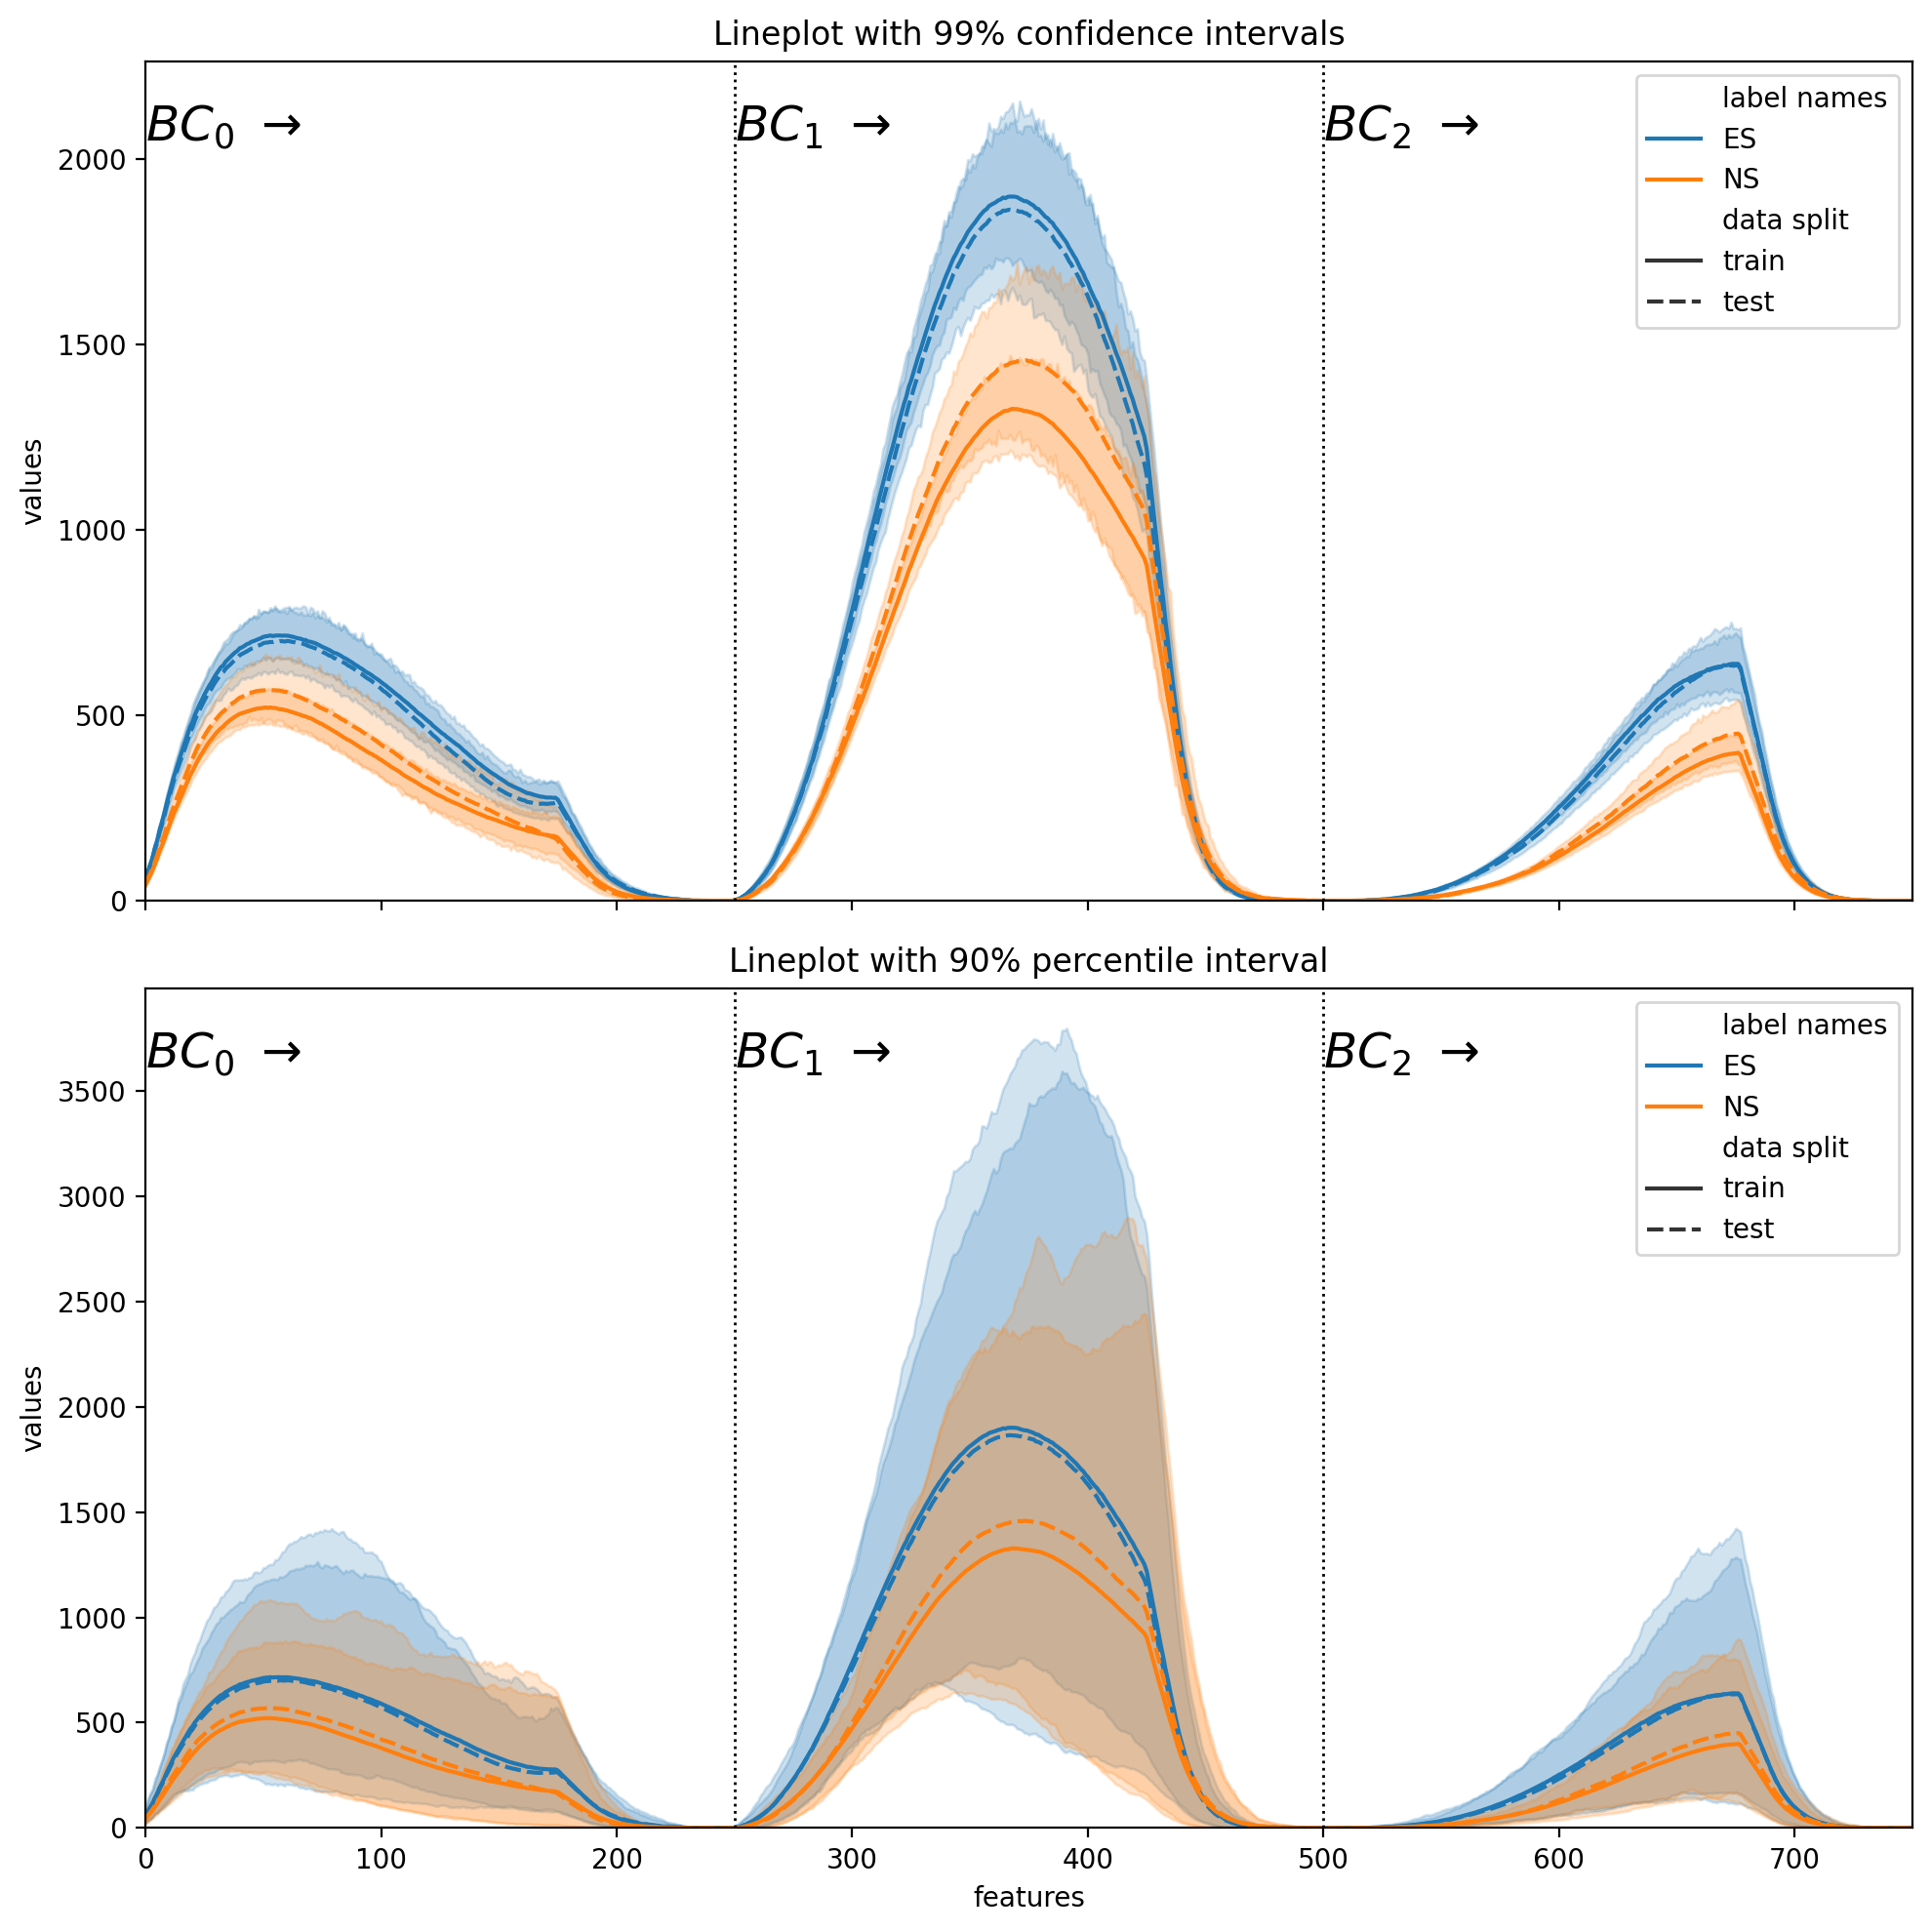

In [26]:
dim = 3
dim = dim -2

df_plot = pd.DataFrame(np.vstack([Xt_train[dim][0], Xt_test[dim][0]]),
                       columns=np.arange(Xt_train[dim][0].shape[1]))
# df_plot['labels'] = np.hstack([y_train, y_test])
# df_plot['train'] = np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))])

# df_melt = df_plot.melt(id_vars=['labels', 'train'], var_name='features', value_name='values')
df_plot.loc[:, 'label names'] = ['ES' if x == 0 else 'NS'
    for x in np.hstack([y_train, y_test]).astype(np.int32)]
df_plot.loc[:, 'data split'] = ['test' if x == 0 else 'train'
    for x in np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)]

df_melt = df_plot.melt(id_vars=['label names', 'data split'],
                       var_name='features', value_name='values')

fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=200, sharex=True)
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('ci', 99), ax=ax[0])
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('pi', 90), ax=ax[1])

dim_borders = [np.shape(Xt_train[dim][0])[1]/(dim+2) * j 
               for j in range(dim+2 + 1)]
dim_textplacement = [0.1 * (dim_borders[i+1] - dim_borders[i+1]) + dim_borders[i]
                     for i in range(len(dim_borders)-1)]

for i in range(len(ax)):
    ax[i].set_xlim(0, np.shape(Xt_train[dim][0])[1])
    ax[i].set_ylim(0, ax[i].get_ylim()[1])
    for j in range(dim + 2):
        ax[i].text(dim_textplacement[j], 0.95 * ax[i].get_ylim()[1],
                 fr'$BC_{j} ~\rightarrow$', fontsize=18,
                 ha='left', va='top', color='black')
        if j > 0:
            ax[i].vlines(np.shape(Xt_train[dim][0])[1]//(dim+2) * j,
                        ax[i].get_ylim()[0], ax[i].get_ylim()[1],
                        color='black', ls='dotted', lw=1)

ax[0].set_title('Lineplot with 99% confidence intervals')
ax[1].set_title('Lineplot with 90% percentile interval')
fig.tight_layout()


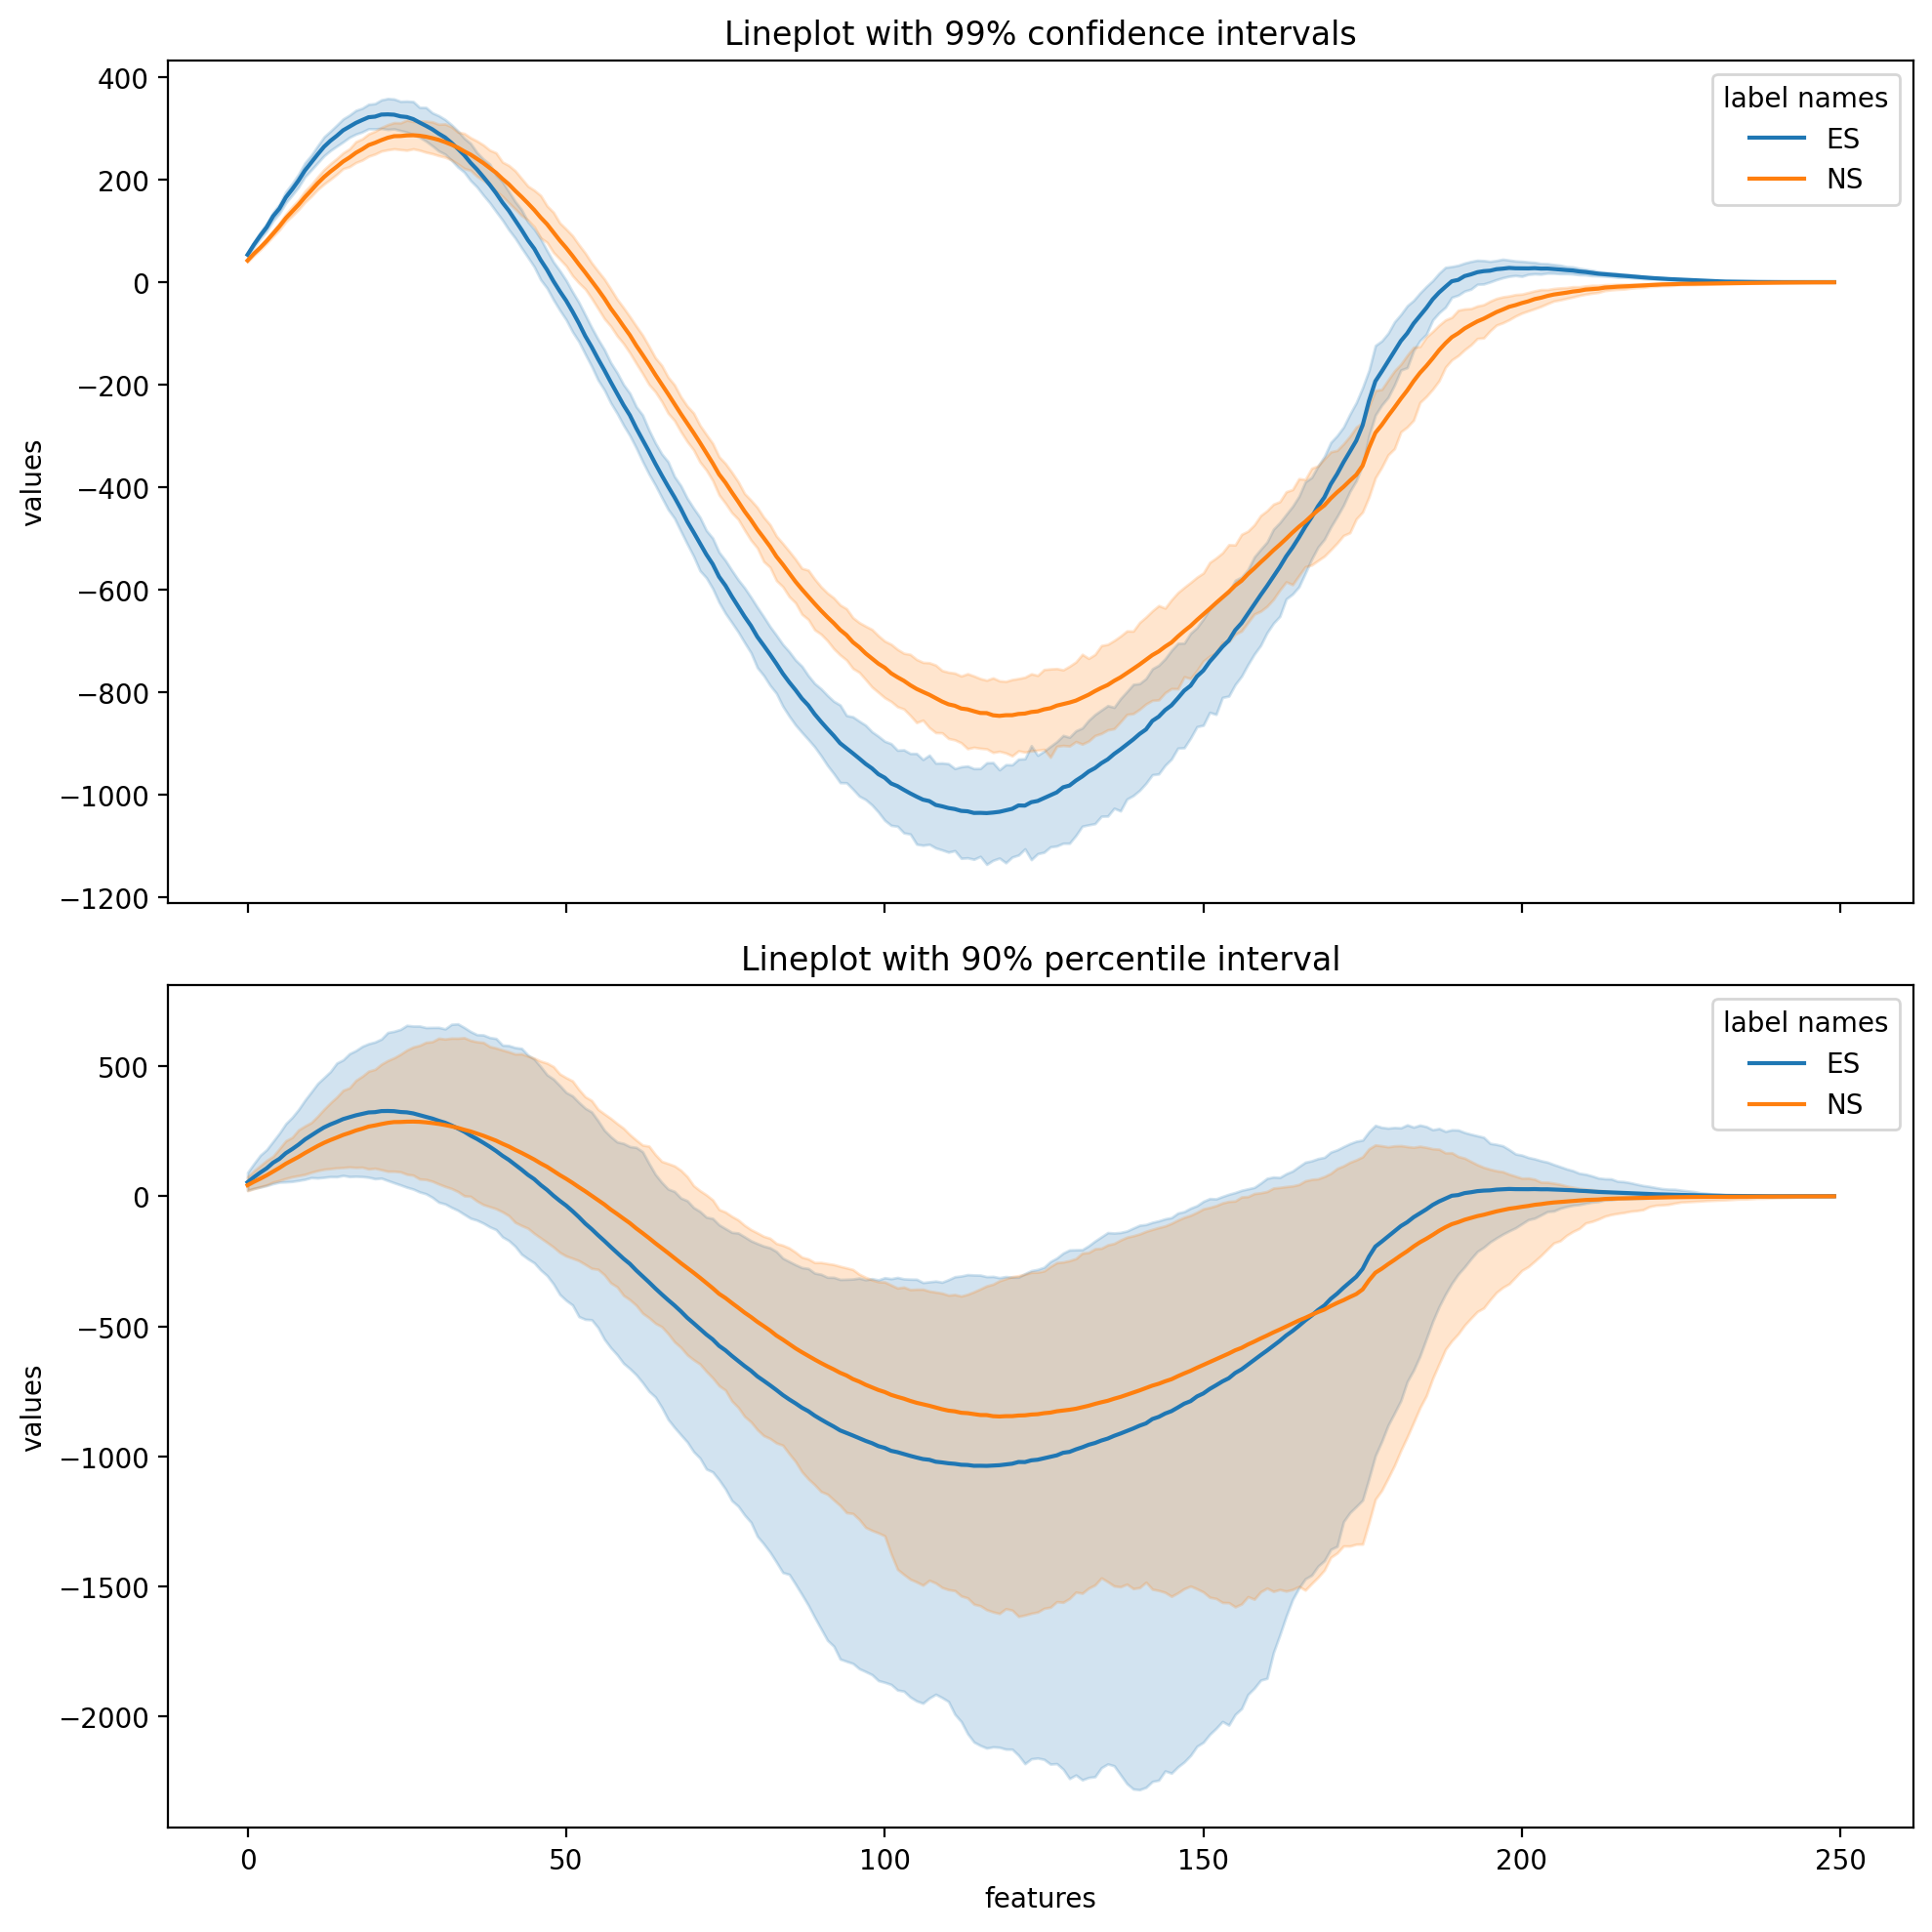

In [81]:
# NOW PLOT THE ECC

dim = 3
dim = dim -2

df_plot = pd.DataFrame(np.vstack([Xt_train[dim][0], Xt_test[dim][0]]),
                       columns=np.arange(Xt_train[dim][0].shape[1]))
for i in range(250):
    df_plot.loc[:, i] = df_plot.loc[:, i] - df_plot.loc[:, i + 250] + df_plot.loc[:, i + 500]
df_plot.drop(columns=[i for i in range(250, 750)], inplace=True)

# df_plot['labels'] = np.hstack([y_train, y_test])
# df_plot['train'] = np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))])

# df_melt = df_plot.melt(id_vars=['labels', 'train'], var_name='features', value_name='values')
df_plot.loc[:, 'label names'] = ['ES' if x == 0 else 'NS'
    for x in np.hstack([y_train, y_test]).astype(np.int32)]
df_plot.loc[:, 'data split'] = ['test' if x == 0 else 'train'
    for x in np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)]

df_melt = df_plot.melt(id_vars=['label names', 'data split'],
                       var_name='features', value_name='values')

fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=200, sharex=True)
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names',# style='data split',
             errorbar=('ci', 99), ax=ax[0])
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names',# style='data split',
             errorbar=('pi', 90), ax=ax[1])

# dim_borders = [np.shape(Xt_train[dim][0])[1]/(dim+2) * j 
#                for j in range(dim+2 + 1)]
# dim_textplacement = [0.1 * (dim_borders[i+1] - dim_borders[i+1]) + dim_borders[i]
#                      for i in range(len(dim_borders)-1)]

# for i in range(len(ax)):
#     ax[i].set_xlim(0, np.shape(Xt_train[dim][0])[1])
#     ax[i].set_ylim(0, ax[i].get_ylim()[1])
#     for j in range(dim + 2):
#         ax[i].text(dim_textplacement[j], 0.95 * ax[i].get_ylim()[1],
#                  fr'$BC_{j} ~\rightarrow$', fontsize=18,
#                  ha='left', va='top', color='black')
#         if j > 0:
#             ax[i].vlines(np.shape(Xt_train[dim][0])[1]//(dim+2) * j,
#                         ax[i].get_ylim()[0], ax[i].get_ylim()[1],
#                         color='black', ls='dotted', lw=1)

ax[0].set_title('Lineplot with 99% confidence intervals')
ax[1].set_title('Lineplot with 90% percentile interval')
fig.tight_layout()

### Airyscan

In [32]:
from src.auxfunctions import compute_hash, same_size_training, sanitize_persistence, drop_all_same, persistence_statistics

preprocessing = 'clip_minmax_gaussian2c_minmax'
df_labels = pd.read_csv(data_pers / 'labels_persistence_airyscan.csv')
labels = df_labels['labels'].values

invariant = 'bc'
cond = invariant

persfolder = pers_airyscan
savepath = classification_path
microscope=None
runs=10
train_percent='70'
run_start=0
persistence_threshold=None
birth_threshold=None
nameappend=''
saveasfile=False
n_jobs=6

if Path(persfolder).is_dir():
    pers_all, pers_keys = read_persistence_files(persfolder,
        preprocessing=preprocessing,
        return_keys=True)
    filename = np.unique([f.name[f.name.index('persistence'):]
                            for f in pers_keys[:,0] if 'persistence' in f.name])
    if len(filename) > 1:
        raise ValueError('More than one persistence file found')
    persfilename = Path(persfolder / filename[0])
else:
    raise ValueError('No persistence file found')

# get the splits
train_test_splits = same_size_training(labels, size=2*runs, train_size=int(train_percent)/100, seed=42)
hashes = np.array([[compute_hash(tt[0]), compute_hash(tt[1])] for tt in train_test_splits])

# now 
delete_idx = []
for i in range(len(hashes)):
    if hashes[i] in hashes[:i]:
        delete_idx.append(i)
train_test_splits = [train_test_splits[i] for i in range(len(train_test_splits)) if i not in delete_idx]
train_test_splits = train_test_splits[run_start:runs]
del hashes

assert len(train_test_splits) == runs - run_start

# now do the classification

results_tmp = []
for runk, train_test in tqdm(enumerate(train_test_splits),
                                total=len(train_test_splits),
                                smoothing=1):
    Xt_train = [[], []]
    Xt_test = [[], []]
    y_train = labels[train_test[0]]
    y_test = labels[train_test[1]]

    for prefix_dim in [2, 3]:
        train_idx = train_test[0]
        test_idx = train_test[1]
        resolution_pi=20
        bandwidth=4
        resolution_bc=250
        return_grid=True
        persistence_threshold = 0.05
        birth_threshold = -0.3
    
        assert 2 in pers_all.keys()
        assert 3 in pers_all.keys()
        assert invariant in ['stat', 'ent', 'bc', 'pi', 'ecc', 'all']
        assert prefix_dim in [2, 3]

        if return_grid:
            assert invariant in ['bc', 'ecc']

        X_train = []
        X_test = []
        y_train = labels[train_idx]
        y_test = labels[test_idx]

        if invariant != 'ecc':
            for dim in range(len(pers_all[prefix_dim])):
                data = pers_all[prefix_dim][dim]
                # data = [x[x[:, 1] != np.inf, :] for x in data]
                data = sanitize_persistence(data, min_pers=persistence_threshold,
                                            max_birth=birth_threshold)

                if invariant == 'stat': 
                    persstats, _ = persistence_statistics(data, return_names=True, lifespan=False)
                    
                    pers_st_train = persstats[train_idx, :]
                    if len(test_idx) > 0:
                        pers_st_test = persstats[test_idx, :]

                    idx_keep, pers_st_train = drop_all_same(pers_st_train)
                    if len(test_idx) > 0:
                        pers_st_test = pers_st_test[:, idx_keep]

                    X_train.append(pers_st_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_st_test)

                elif invariant == 'ent':
                    ent = Entropy(mode='vector', normalized=False)
                    pers_ent_train = ent.fit_transform([data[i] for i in train_idx])
                    if len(test_idx) > 0:
                        pers_ent_test = ent.transform([data[i] for i in test_idx])

                    ent = Entropy(mode='scalar', normalized=False)
                    pers_ent_train = np.hstack([ent.fit_transform([data[i] for i in train_idx]),
                                            pers_ent_train])
                    if len(test_idx) > 0:
                        pers_ent_test = np.hstack([ent.transform([data[i] for i in test_idx]),
                                                pers_ent_test])

                    idx_keep, pers_ent_train = drop_all_same(pers_ent_train)
                    if len(test_idx) > 0:
                        pers_ent_test = pers_ent_test[:, idx_keep]

                    X_train.append(pers_ent_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_ent_test)
                
                elif invariant == 'bc':
                    inv_bc = BettiCurve(resolution=resolution_bc)
                    pers_bc_train = inv_bc.fit_transform([data[i] for i in train_idx])
                    if len(test_idx) > 0:
                        pers_bc_test = inv_bc.transform([data[i] for i in test_idx])

                    idx_keep, pers_bc_train = drop_all_same(pers_bc_train)
                    if len(test_idx) > 0:
                        pers_bc_test = pers_bc_test[:, idx_keep]

                    X_train.append(pers_bc_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_bc_test)

                    if return_grid:
                        grid = inv_bc.grid_
                
                elif invariant == 'pi':
                    inv_pi = PersistenceImage(bandwidth=bandwidth,
                            resolution=[resolution_pi, resolution_pi])
                    pers_pi_train = inv_pi.fit_transform([data[i] for i in train_idx])
                    if len(test_idx) > 0:
                        pers_pi_test = inv_pi.transform([data[i] for i in test_idx])

                    idx_keep, pers_pi_train = drop_all_same(pers_pi_train)
                    if len(test_idx) > 0:
                        pers_pi_test = pers_pi_test[:, idx_keep]

                    X_train.append(pers_pi_train)
                    if len(test_idx) > 0:
                        X_test.append(pers_pi_test)
            X_train = np.hstack(X_train)
            if len(test_idx) > 0:
                X_test = np.hstack(X_test)
            else:
                X_test = np.array([])
        else:
            raise ValueError('Invalid invariant')

        # print('intermed', np.shape(X_train), np.shape(X_test), cond, prefix_dim)

    #     ss = StandardScaler()
    #     X_train = ss.fit_transform(X_train)
    #     X_test = ss.transform(X_test)

    #     # We can also use SimpleImputer etc
    #     # remove rows if they contain more than 20% of nan values

    #     # if np.any(np.isnan(X_train)) or np.any(np.isnan(X_test)):
    #     #     nanidx = np.all(np.isnan(X_train), axis=1)
    #     #     if np.any(nanidx):
    #     #         print('Dropping nan rows', np.sum(nanidx), cond)
    #     #         X_train = X_train[~nanidx, :]
    #     #         y_train = y_train[~nanidx]

    #     #     nanidx = np.all(np.isnan(X_test), axis=1)
    #     #     if np.any(nanidx):
    #     #         print('Dropping nan rows', np.sum(nanidx), cond)
    #     #         X_test = X_test[~nanidx, :]
    #     #         y_test = y_test[~nanidx]
        
    #     # if np.count_nonzero(np.sum(np.isnan(X_train), axis=1)) < 2:
    #     #     if np.sum(np.isnan(X_train), axis=1).max() > 10:
    #     #         # print('Dropping nan rows', np.sum(np.isnan(X_train), axis=1))
    #     #         idx_remain = ~np.any(np.isnan(X_train), axis=1)
    #     #         X_train = X_train[idx_remain, :]
    #     #         y_train = y_train[idx_remain]

        drop_col = np.unique(np.where(np.isnan(X_train))[1])
        if len(drop_col) > 0:
            print('Dropping nan columns', drop_col, cond)
            remaining_col = np.sum(np.isnan(X_train), axis=0) == 0
            X_train = X_train[:, remaining_col]
            X_test = X_test[:, remaining_col]

        idx_fill = np.where(np.abs(X_test) >= np.finfo(np.float32).max)
        X_test[idx_fill] = np.nanmean(X_train[:, np.unique(idx_fill[1])], axis=0)
        idx_fill = np.where(np.isnan(X_test))
        X_test[idx_fill] = np.nanmean(X_train[:, np.unique(idx_fill[1])], axis=0)

        if len(X_train.shape) == 0 or len(X_test.shape) == 0:
            print(np.shape(X_train), np.shape(X_test), cond)
            print(np.any(np.isnan(X_train)), np.any(np.isnan(X_test)))
            print('EMPTY training/test set', cond, persfilename.name)
            continue

        Xt_train[prefix_dim - 2].append(X_train.copy())
        Xt_test[prefix_dim - 2].append(X_test.copy())

    # # now do the Classification via GridSearch
    # if np.any(np.isnan(X_train)) or np.any(np.isnan(X_test)):
    #     print('NaN in training/test set', cond, persfilename.name)
    #     continue
    # print('run', run_start, ', vectorization:', cond, ', dim:', prefix_dim,
    #         ', shape:', np.shape(X_train), np.shape(X_test))
    break
                
                

  0%|          | 0/10 [00:00<?, ?it/s]

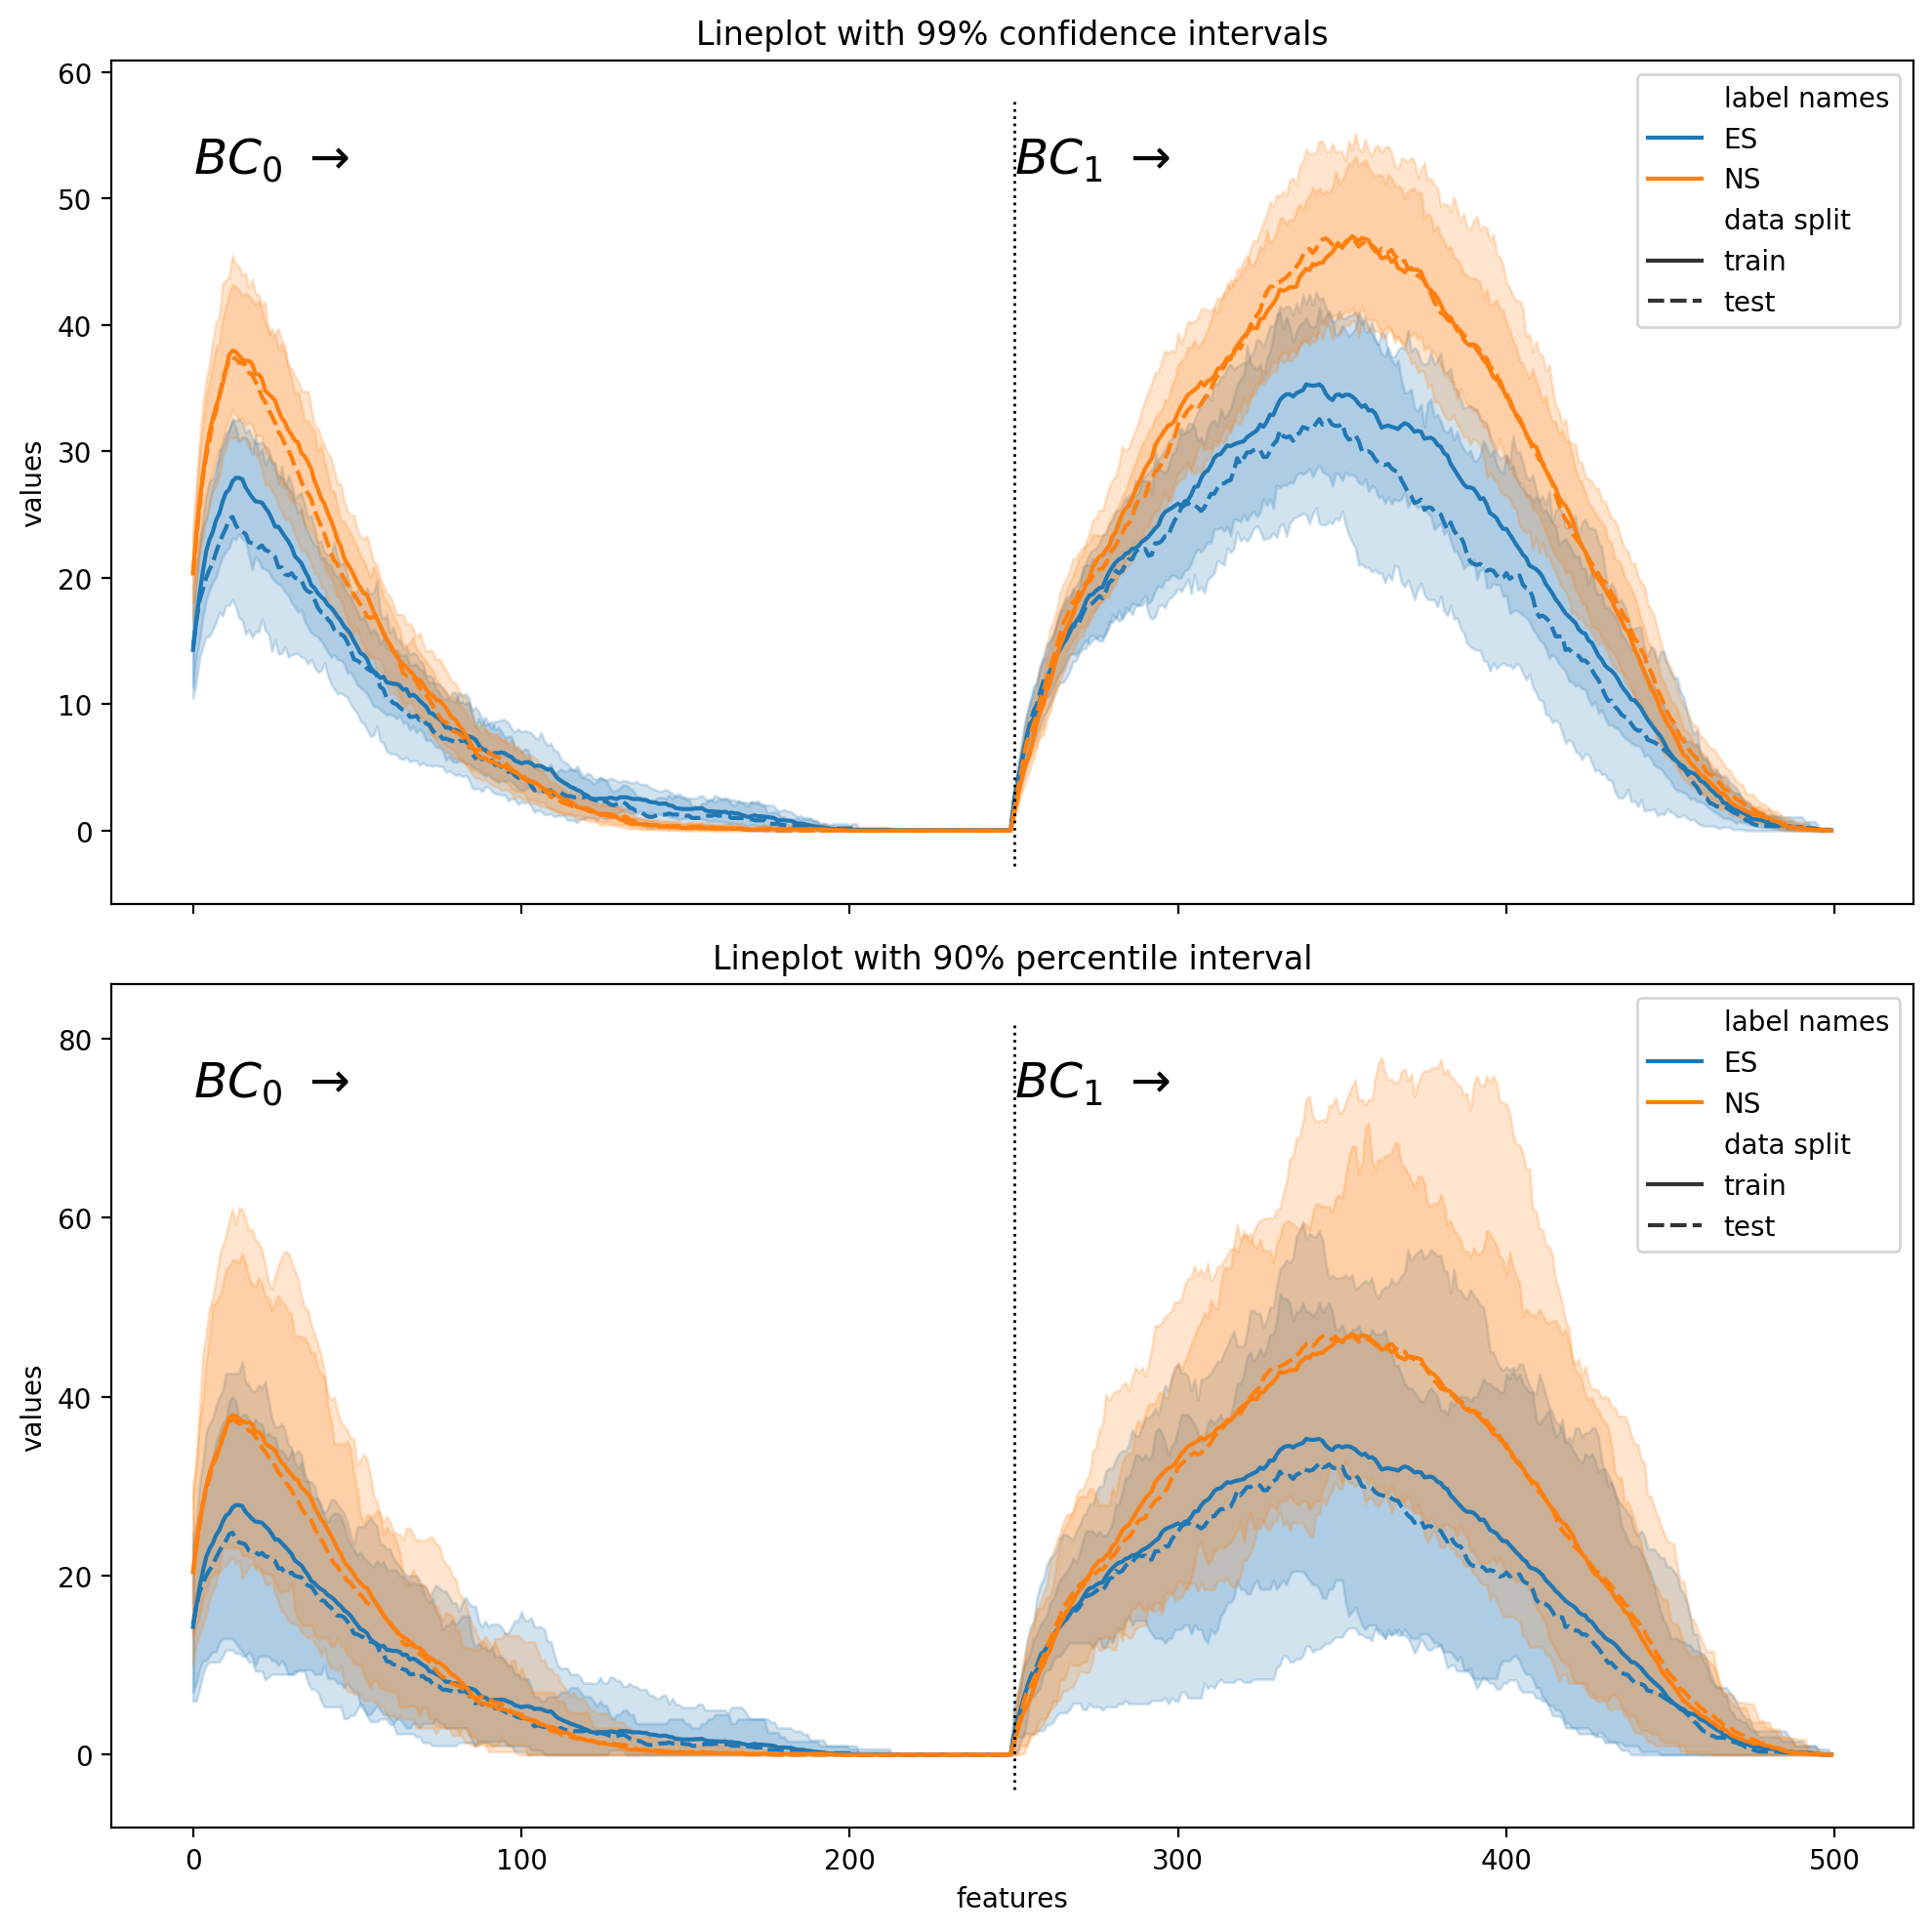

In [34]:
dim = 2
dim = dim -2

df_plot = pd.DataFrame(np.vstack([Xt_train[dim][0], Xt_test[dim][0]]),
                       columns=np.arange(Xt_train[dim][0].shape[1]))
# df_plot['labels'] = np.hstack([y_train, y_test]).astype(np.int32)
# df_plot['train'] = np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)

df_plot.loc[:, 'label names'] = ['ES' if x == 0 else 'NS'
    for x in np.hstack([y_train, y_test]).astype(np.int32)]
df_plot.loc[:, 'data split'] = ['test' if x == 0 else 'train'
    for x in np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)]

df_melt = df_plot.melt(id_vars=['label names', 'data split'],
                       var_name='features', value_name='values')

fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=200, sharex=True)
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('ci', 99), ax=ax[0])
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('pi', 90), ax=ax[1])

dim_borders = [np.shape(Xt_train[dim][0])[1]/(dim+2) * j 
               for j in range(dim+2 + 1)]
dim_textplacement = [0.1 * (dim_borders[i+1] - dim_borders[i+1]) + dim_borders[i]
                     for i in range(len(dim_borders)-1)]

for i in range(len(ax)):
    for j in range(dim + 2):
        ax[i].text(dim_textplacement[j], 0.95 * ax[i].get_ylim()[1],
                 fr'$BC_{j} ~\rightarrow$', fontsize=18,
                 ha='left', va='top', color='black')
        if j > 0:
            ax[i].vlines(np.shape(Xt_train[dim][0])[1]//(dim+2) * j,
                        ax[i].get_ylim()[0], ax[i].get_ylim()[1],
                        color='black', ls='dotted', lw=1)
        
ax[0].set_title('Lineplot with 99% confidence intervals')
ax[1].set_title('Lineplot with 90% percentile interval')
fig.tight_layout()

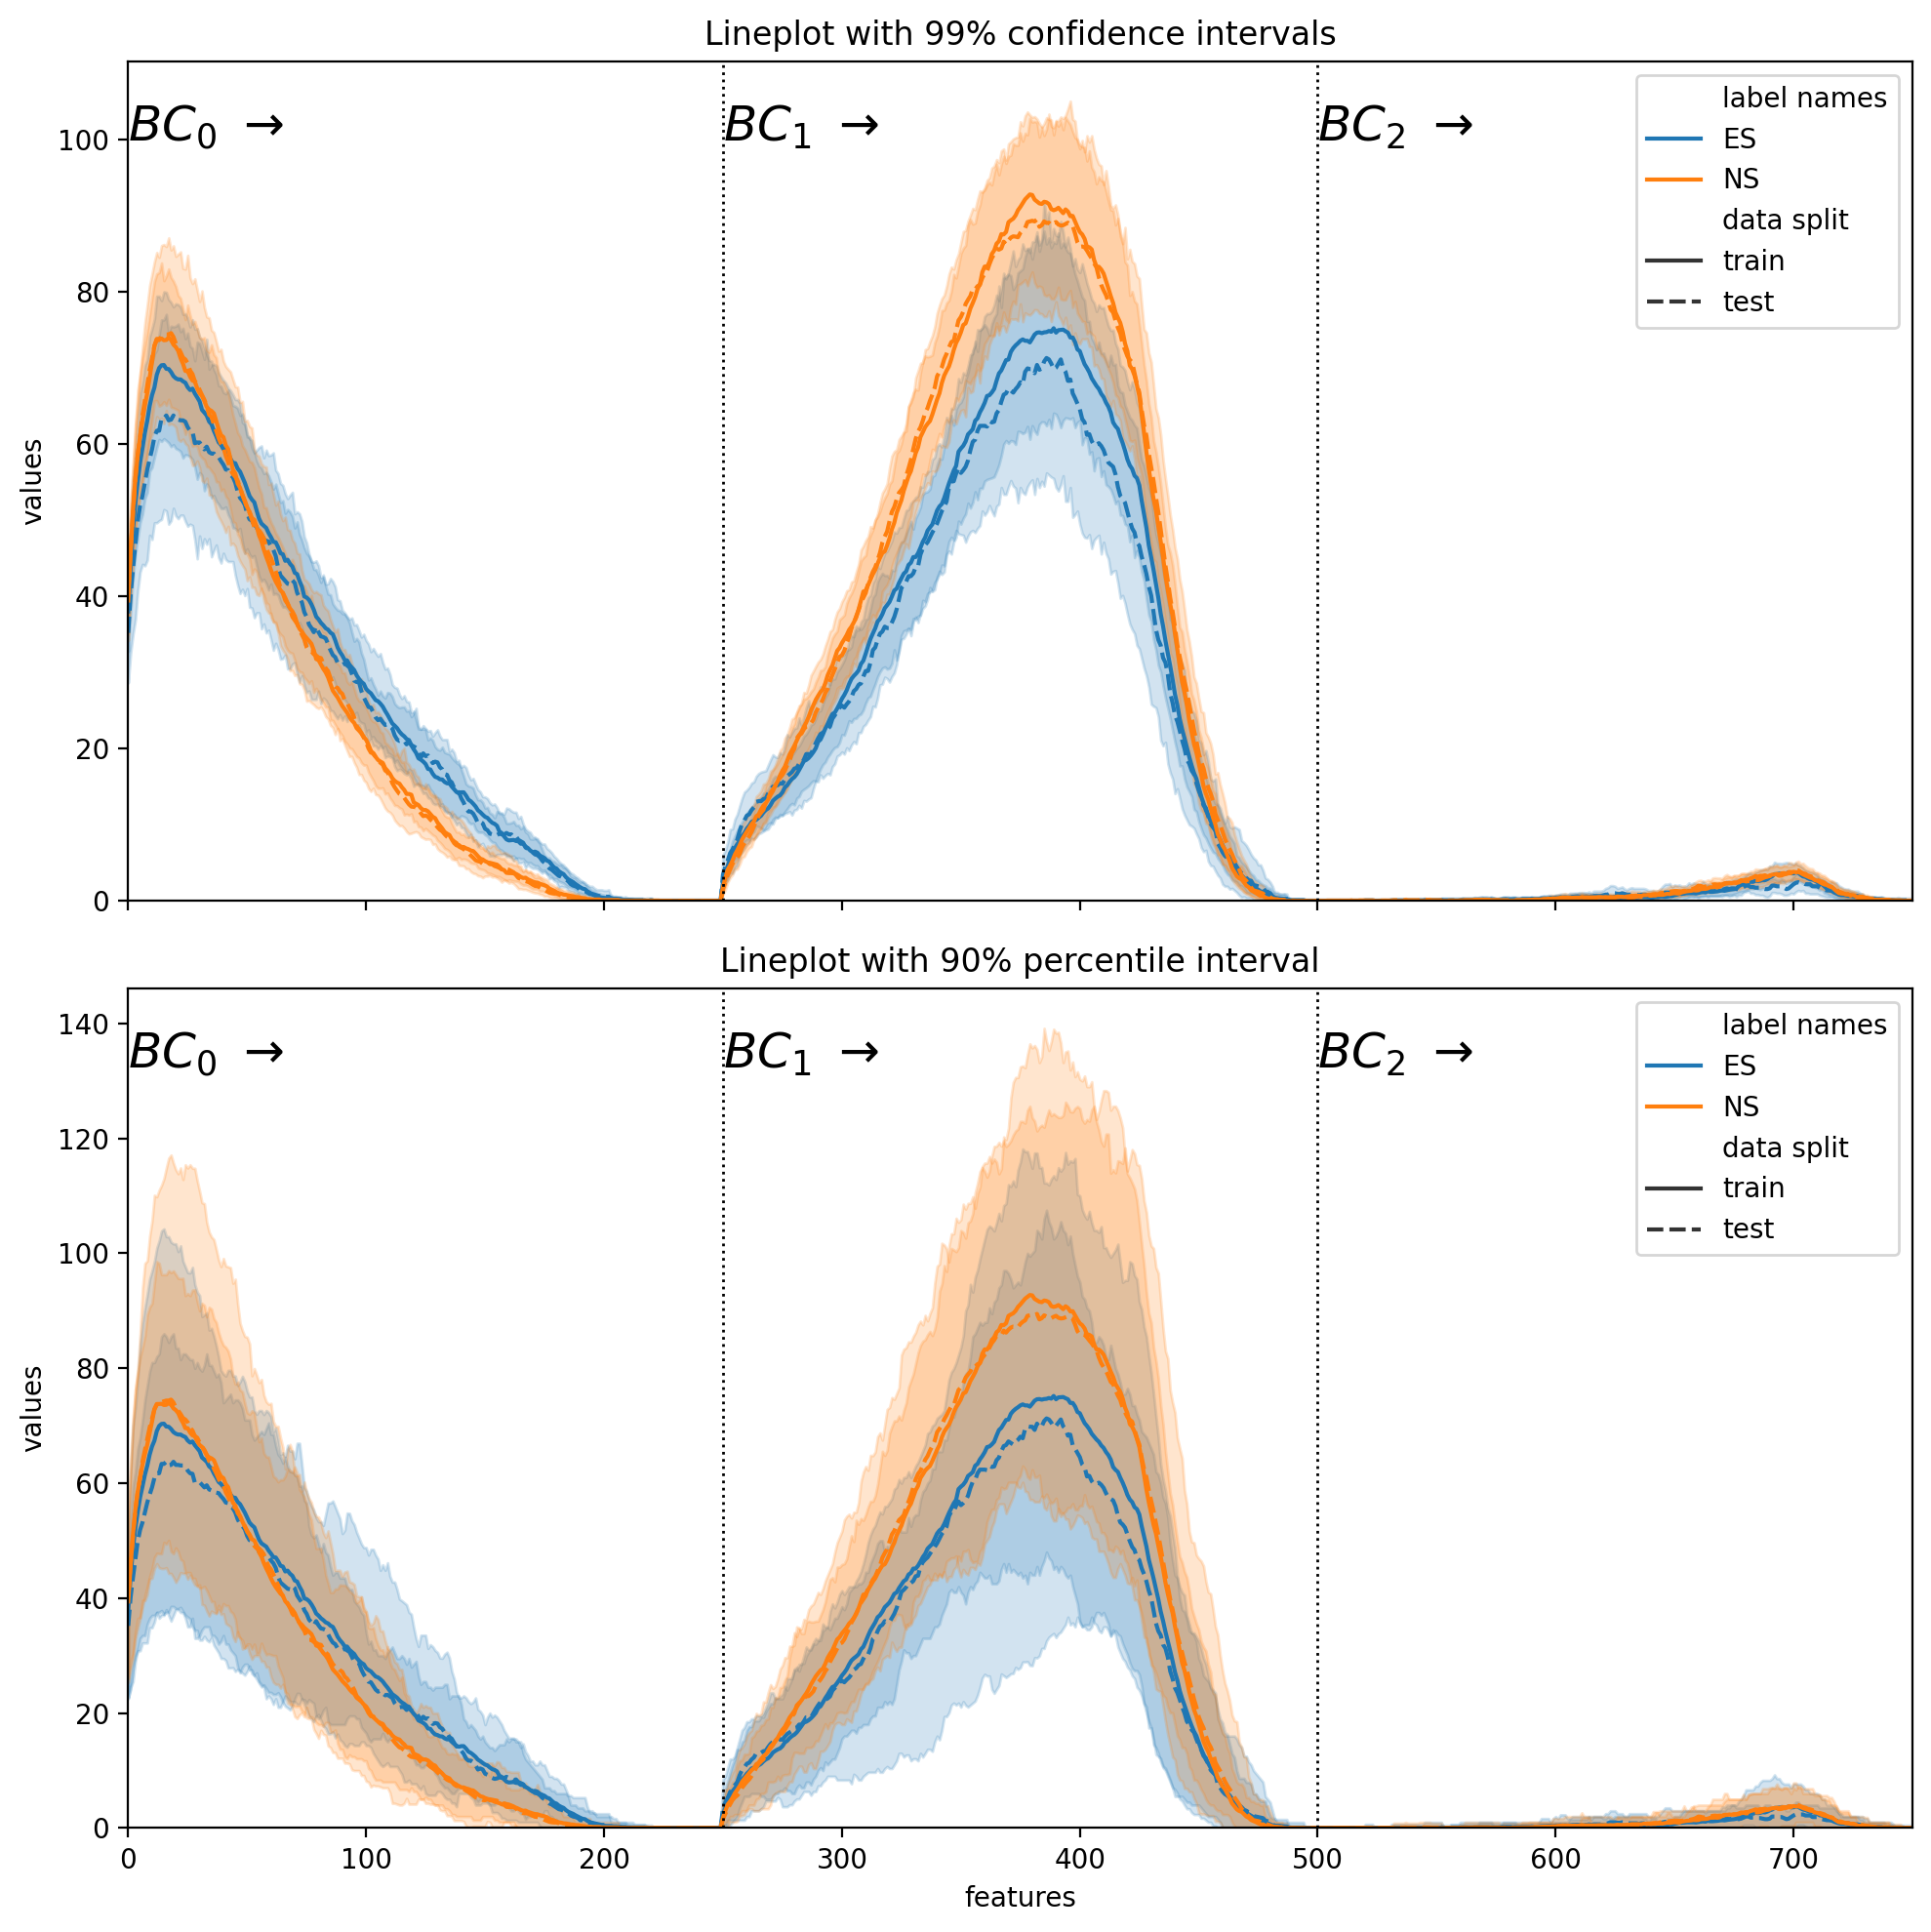

In [33]:
dim = 3
dim = dim -2

df_plot = pd.DataFrame(np.vstack([Xt_train[dim][0], Xt_test[dim][0]]),
                       columns=np.arange(Xt_train[dim][0].shape[1]))
# df_plot['labels'] = np.hstack([y_train, y_test])
# df_plot['train'] = np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))])

# df_melt = df_plot.melt(id_vars=['labels', 'train'], var_name='features', value_name='values')
df_plot.loc[:, 'label names'] = ['ES' if x == 0 else 'NS'
    for x in np.hstack([y_train, y_test]).astype(np.int32)]
df_plot.loc[:, 'data split'] = ['test' if x == 0 else 'train'
    for x in np.hstack([np.ones(len(y_train)), np.zeros(len(y_test))]).astype(np.int32)]

df_melt = df_plot.melt(id_vars=['label names', 'data split'],
                       var_name='features', value_name='values')

fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=200, sharex=True)
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('ci', 99), ax=ax[0])
sns.lineplot(data=df_melt, x='features', y='values',
             hue='label names', style='data split',
             errorbar=('pi', 90), ax=ax[1])

dim_borders = [np.shape(Xt_train[dim][0])[1]/(dim+2) * j 
               for j in range(dim+2 + 1)]
dim_textplacement = [0.1 * (dim_borders[i+1] - dim_borders[i+1]) + dim_borders[i]
                     for i in range(len(dim_borders)-1)]

for i in range(len(ax)):
    ax[i].set_xlim(0, np.shape(Xt_train[dim][0])[1])
    ax[i].set_ylim(0, ax[i].get_ylim()[1])
    for j in range(dim + 2):
        ax[i].text(dim_textplacement[j], 0.95 * ax[i].get_ylim()[1],
                 fr'$BC_{j} ~\rightarrow$', fontsize=18,
                 ha='left', va='top', color='black')
        if j > 0:
            ax[i].vlines(np.shape(Xt_train[dim][0])[1]//(dim+2) * j,
                        ax[i].get_ylim()[0], ax[i].get_ylim()[1],
                        color='black', ls='dotted', lw=1)

ax[0].set_title('Lineplot with 99% confidence intervals')
ax[1].set_title('Lineplot with 90% percentile interval')
fig.tight_layout()


# Segementation

In [18]:
vec_sted = data_pers / 'vectorizations_sted'
vec_airyscan = data_pers / 'vectorizations_airyscan'

In [19]:
preprocessing = 'clip_minmax_gaussian2c_minmax'
microscope = 'airyscan'


if microscope.lower() == 'sted':
    pers_folder = pers_sted
    vect_folder = vec_sted
elif microscope.lower() == 'airyscan':
    pers_folder = pers_airyscan
    vect_folder = vec_airyscan
else:
    raise ValueError('Microscope not recognized!')

pers_all, keys = read_persistence_files(pers_folder, preprocessing, return_keys=True)
if pers_all is None:
    print('No persistence files for this preprocessing steps found!')
df_labels = pd.read_csv(data_pers / f'labels_persistence_{microscope.lower()}.csv')
labels = df_labels['labels'].values

In [20]:
from src.auxfunctions import compute_vectorizations_all
df_tmp = \
    compute_vectorizations_all(labels, pers_all, resolution_pi=20, bandwidth=4, resolution_bc=250,
        birth_threshold=-0.1, persistence_threshold=0.05)

# df_vectorizations.to_csv(vect_folder / f'vectorizations_all_{microscope.lower()}_{preprocessing}.csv',
#                          index=False)

  0%|          | 0/2 [00:00<?, ?it/s]

A: 284
B: 69
A: 683
B: 113


 50%|█████     | 1/2 [00:00<00:00,  2.49it/s]

A: 976
B: 144
A: 3268
B: 244
A: 1699
B: 27


100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


0.9999968208395762


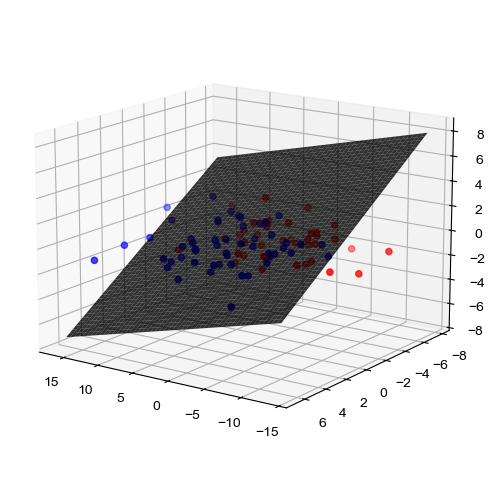

In [21]:
from sklearn.decomposition import PCA

# df_tmp = pd.read_csv(Path(vectorization_sted, 'vectorizations_all_sted_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'pi' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)
y = df_tmp['labels'].values.copy()

varexplained = np.sum(pca.explained_variance_ratio_)
print(varexplained)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

# Scatter plot with color based on y values
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
                c=colors, marker='o')
ax.azim = 125
ax.elev = 15

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = -w[0] / w[2]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = np.linspace(min(X[:, 1]), max(X[:, 1]))
YY, XX = np.meshgrid(yy, xx)

# Compute ZZ only if w[2] is not zero
if abs(w[2]) > 1e-10:  # Prevent division by zero or near-zero errors
    ZZ = (-w[0] * XX - w[1] * YY - b) / w[2]
else:
    ZZ = np.full_like(XX, np.mean(X[:, 2]))  # Use mean Z-plane if w[2] is too small

# Plot the separating hyperplane
ax.plot_surface(XX, YY, ZZ, color='black', alpha=0.8)

0.521591880706393


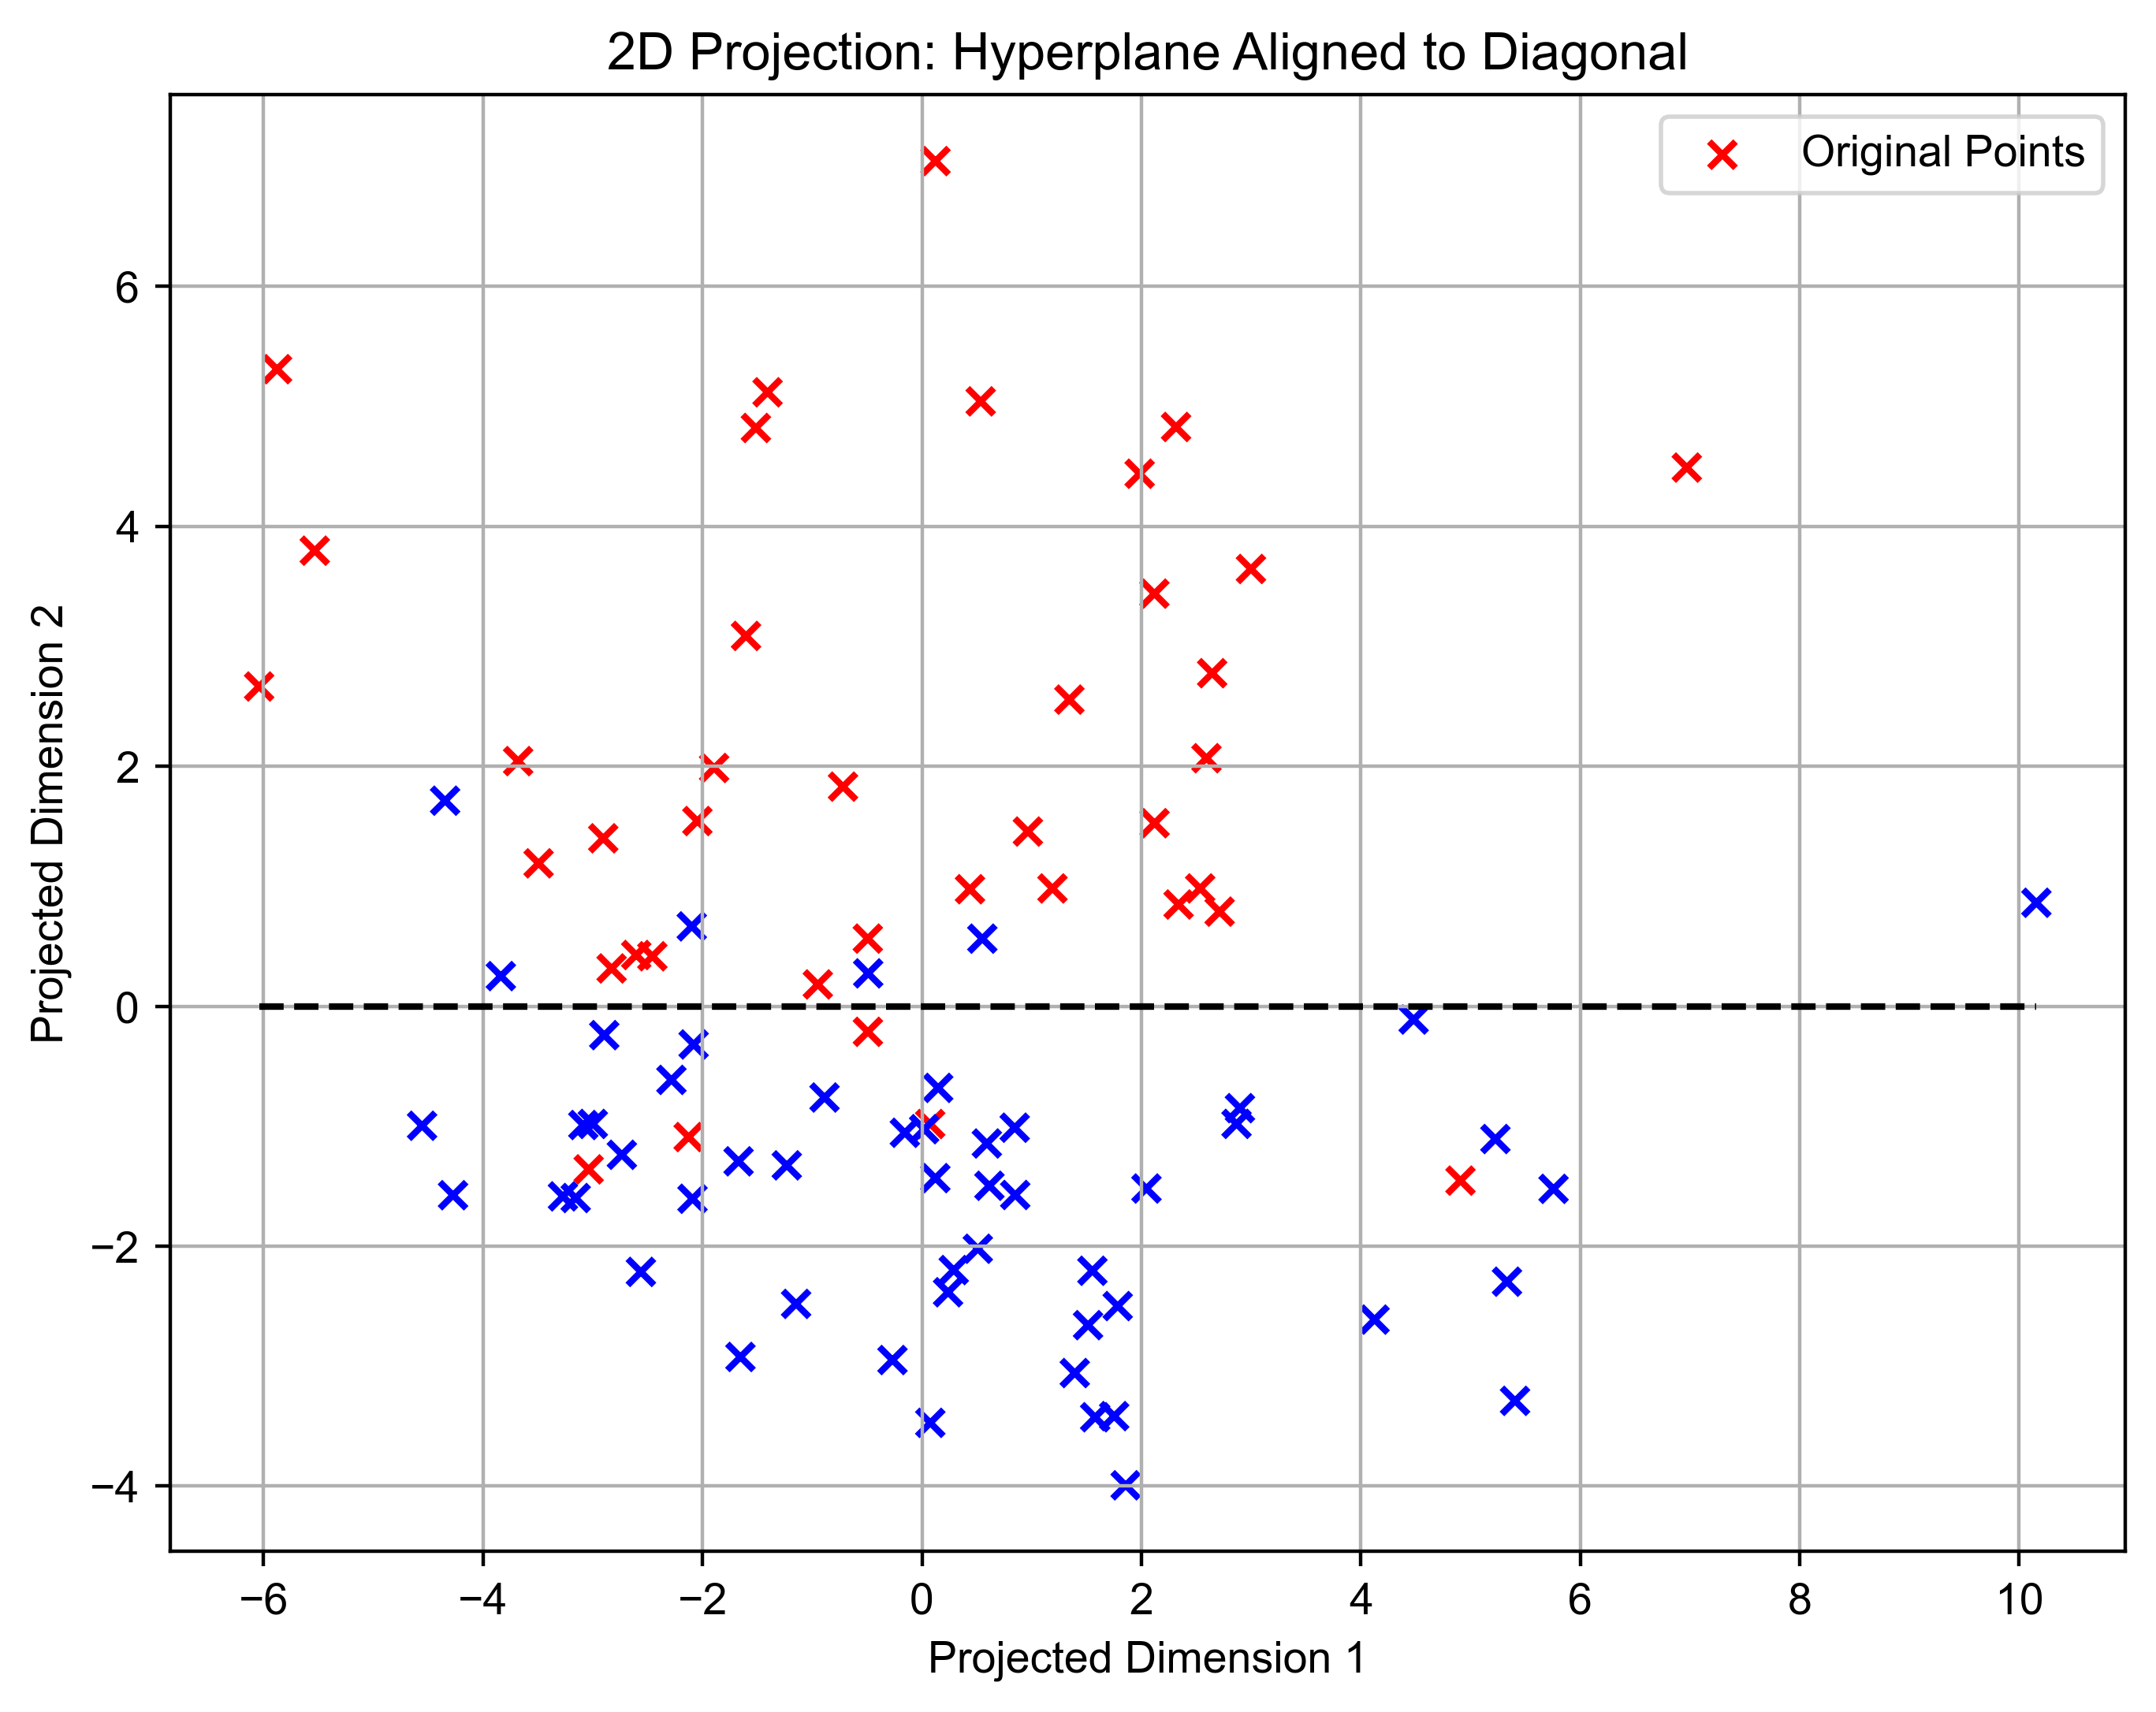

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm

# df_tmp = pd.read_csv(Path(vectorization_sted, 'vectorizations_all_sted_clip_minmax_gaussian2c_minmax.csv'))
# selection = [x for x in df_tmp.columns if 'labels' not in x and 'pi' in x and int(x.split('_')[2]) == 3]
selection = [x for x in df_tmp.columns if 'labels' not in x and 'bc' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)
y = df_tmp['labels'].copy()

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)

varexplained = np.sum(pca.explained_variance_ratio_)
print(varexplained)

# Train SVM with a linear kernel
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

# Extract hyperplane parameters
w = clf.coef_[0]  # Normal vector to the hyperplane
b = clf.intercept_[0]

# Compute two orthonormal basis vectors that span the hyperplane
w_norm = w / np.linalg.norm(w)  # Normalize w
U, _, _ = np.linalg.svd(np.eye(3) - np.outer(w_norm, w_norm))  # Find orthonormal basis
basis_1, basis_2 = U[:, 1], U[:, 2]  # Two vectors spanning the hyperplane

# Project points onto the hyperplane
distances = (X @ w + b) / np.linalg.norm(w)  # Signed distances
X_hyper = X - np.outer(distances, w_norm)  # Projected points

# Transform hyperplane points into 2D
X_2D = np.column_stack([X_hyper @ basis_1, X_hyper @ basis_2])
Xorg_2D = np.column_stack([X @ basis_1, X @ basis_2])

# Rotate to align with the diagonal (45-degree rotation)
theta = np.pi
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_2D_rotated = X_2D @ rotation_matrix
Xorg_2D_rotated = Xorg_2D @ rotation_matrix

y_unq = np.unique(X_2D_rotated[:,1])
assert np.all(np.diff(y_unq) < 1e-14)
y_unq = np.mean(y_unq)


red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

# Scatter plot in 2D
plt.figure(figsize=(8, 6), dpi=400)
plt.hlines(0, np.min(Xorg_2D_rotated[:, 0]), np.max(Xorg_2D_rotated[:, 0]), color='black', linestyle='--')
plt.scatter(Xorg_2D_rotated[:, 0], Xorg_2D_rotated[:, 1]-y_unq,
            color=colors, marker='x', label="Original Points")

# Labels
plt.xlabel("Projected Dimension 1")
plt.ylabel("Projected Dimension 2")
plt.title("2D Projection: Hyperplane Aligned to Diagonal")
plt.legend()
plt.grid()

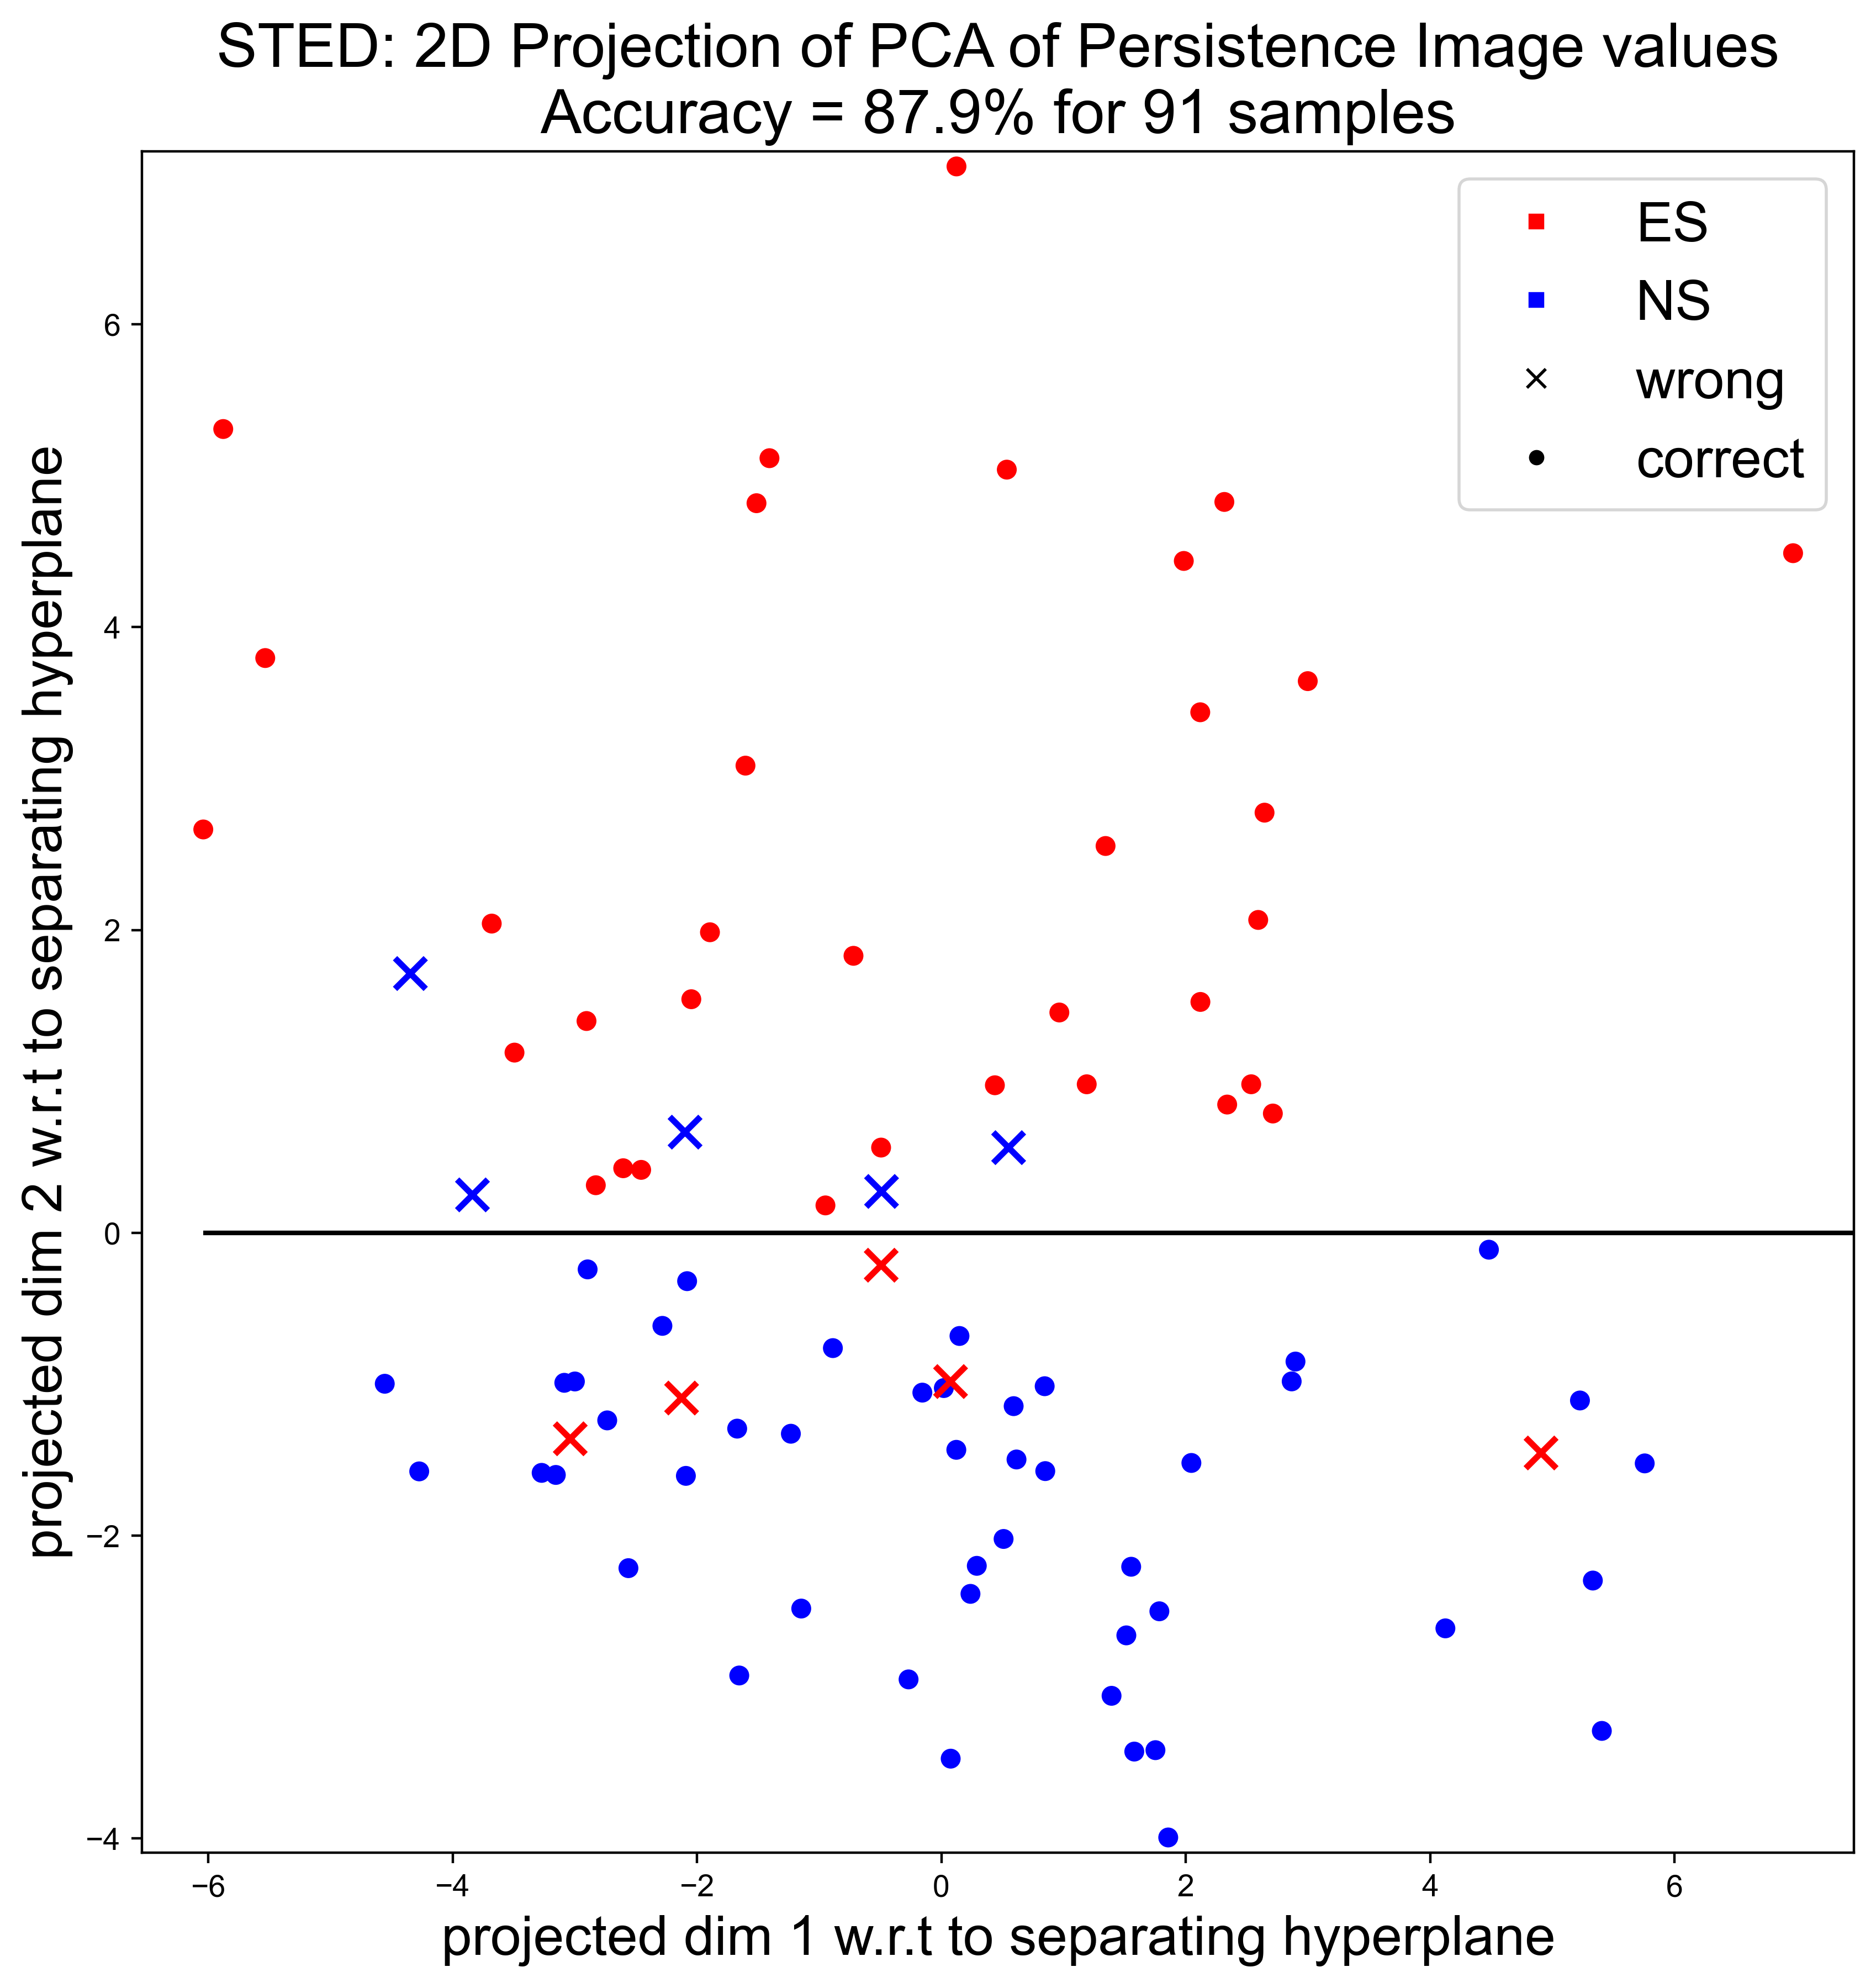

In [23]:
import matplotlib.lines as mlines

plt.rcParams['font.family'] = 'Arial'

# Scatter plot in 2D
fig, ax = plt.subplots(figsize=(10,10), dpi=400)
ax.hlines(0, np.min(X_2D_rotated[:, 0]), np.max(X_2D_rotated[:, 0]), color='black')

ypredict = model.predict(X)
idx_right = ypredict == y
idx_wrong = ypredict != y

# ax.scatter(Xorg_2D_rotated[idx_right, 0], Xorg_2D_rotated[idx_right, 1]-y_unq,
#            c=y[idx_right],
#            cmap="coolwarm",
#            marker='.',
#            label="Correct Points")
# ax.scatter(Xorg_2D_rotated[idx_wrong, 0], Xorg_2D_rotated[idx_wrong, 1]-y_unq,
#            c=y[idx_wrong],
#            cmap="coolwarm",
#            marker='x',
#            label="Incorrect Points")

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

idx_sort = np.argsort(Xorg_2D_rotated[:, 0])
Xplot = Xorg_2D_rotated[idx_sort, :]
yplot = y[idx_sort]
idx_right = idx_right[idx_sort]
idx_wrong = idx_wrong[idx_sort]

colors_right = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_right]]
colors_wrong = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_wrong]]

ax.scatter(Xplot[idx_right, 0], Xplot[idx_right, 1]-y_unq,
           c=colors_right,
           marker='.',
           s=120, #edgecolors='black', #alpha=0.8,
           label="Correct Points")
ax.scatter(Xplot[idx_wrong, 0], Xplot[idx_wrong, 1]-y_unq,
           c=colors_wrong,
           marker='x',
           s=100, #edgecolors='black',
           lw=2,
           label="Incorrect Points")

# we have two outliers; we remove them
sortedxvals = np.sort(Xorg_2D_rotated[:, 0])
lastx_incluster = sortedxvals[np.argmax(np.diff(sortedxvals))]

idx_inside = np.where(Xorg_2D_rotated[:, 0] < lastx_incluster)[0]
ax.set_xlim(sortedxvals[0]-0.5, lastx_incluster+0.5)
ax.set_ylim(np.min(Xorg_2D_rotated[idx_inside, 1])-y_unq-0.1,
            np.max(Xorg_2D_rotated[idx_inside, 1])-y_unq+0.1)

# Labels
plt.xlabel("projected dim 1 w.r.t to separating hyperplane", fontsize=18)
plt.ylabel("projected dim 2 w.r.t to separating hyperplane", fontsize=18)
plt.title("STED: 2D Projection of PCA of Persistence Image values\nAccuracy = {:.1f}% for {:d} samples".format(np.mean(idx_right)*100, len(idx_right)),
          fontsize=20)
# Add two points to the legend

handles, labels = ax.get_legend_handles_labels()
colors = plt.cm.coolwarm([0,300])

# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=red, markersize=6, label='ES'))
# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=blue, markersize=6, label='NS'))

handles = [mlines.Line2D([], [], marker='s', color='w', markerfacecolor=red, markersize=6, label='ES'),
           mlines.Line2D([], [], marker='s', color='w', markerfacecolor=blue, markersize=6, label='NS'),
           mlines.Line2D([], [], marker='x', color='black', markersize=6, linestyle=None, lw=0, label='wrong'),
           mlines.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=6, label='correct')
           ]
ax.legend(handles=handles, fontsize=18)

fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_bc_filtered_pers0_05_maxbirth_0_1.pdf', dpi=400, bbox_inches='tight')
# fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_pi.png', dpi=400)